## Download Historical Data About Various Coins

In [1]:
import yfinance as yf

yf_data = yf.download(['ADA-USD', 'BNB-USD', 'BTC-USD', 'ETH-USD','XRP-USD','DOT-USD','MATIC-USD','SOL-USD'],
                      start='2016-01-01')
yf_data

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


[*********************100%***********************]  8 of 8 completed


Price      Adj Close                                                    \
Ticker       ADA-USD     BNB-USD        BTC-USD   DOT-USD      ETH-USD   
Date                                                                     
2016-01-01       NaN         NaN     434.334015       NaN          NaN   
2016-01-02       NaN         NaN     433.437988       NaN          NaN   
2016-01-03       NaN         NaN     430.010986       NaN          NaN   
2016-01-04       NaN         NaN     433.091003       NaN          NaN   
2016-01-05       NaN         NaN     431.959991       NaN          NaN   
...              ...         ...            ...       ...          ...   
2025-01-14  0.994909  698.619690   96534.046875  6.664539  3223.684570   
2025-01-15  1.079154  714.028442  100504.492188  7.164988  3450.537598   
2025-01-16  1.090099  708.298035   99756.906250  7.150223  3308.345215   
2025-01-17  1.135122  721.750488  104462.039062  7.512493  3474.107178   
2025-01-18  1.066237  699.104614  102965.210938  6.984463  3252.052490   

Price                                          Close              ...  \
Ticker     MATIC-USD     SOL-USD   XRP-USD   ADA-USD     BNB-USD  ...   
Date                                                              ...   
2016-01-01       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-02       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-03       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-04       NaN         NaN       NaN       NaN         NaN  ...   
2016-01-05       NaN         NaN       NaN       NaN         NaN  ...   
...              ...         ...       ...       ...         ...  ...   
2025-01-14  0.455653  187.498596  2.669133  0.994909  698.619690  ...   
2025-01-15  0.486329  205.911346  3.155058  1.079154  714.028442  ...   
2025-01-16  0.472903  211.227844  3.245540  1.090099  708.298035  ...   
2025-01-17  0.507612  219.621613  3.298635  1.135122  721.750488  ...   
2025-01-18  0.474008  240.566513  3.112469  1.066237  699.104614  ...   

Price             Open                  Volume                             \
Ticker         SOL-USD   XRP-USD       ADA-USD       BNB-USD      BTC-USD   
Date                                                                        
2016-01-01         NaN       NaN           NaN           NaN     36278900   
2016-01-02         NaN       NaN           NaN           NaN     30096600   
2016-01-03         NaN       NaN           NaN           NaN     39633800   
2016-01-04         NaN       NaN           NaN           NaN     38477500   
2016-01-05         NaN       NaN           NaN           NaN     34522600   
...                ...       ...           ...           ...          ...   
2025-01-14  182.832993  2.522891  1.119016e+09  1.566845e+09  53769675818   
2025-01-15  187.498184  2.669167  2.210962e+09  1.856118e+09  57805923627   
2025-01-16  205.921967  3.155391  2.245926e+09  1.899114e+09  54103781805   
2025-01-17  211.228409  3.245321  1.819221e+09  1.946000e+09  71888972663   
2025-01-18  219.605881  3.297810  1.908267e+09  2.139344e+09  68626980864   

Price                                                                          
Ticker          DOT-USD       ETH-USD   MATIC-USD       SOL-USD       XRP-USD  
Date                                                                           
2016-01-01          NaN           NaN         NaN           NaN           NaN  
2016-01-02          NaN           NaN         NaN           NaN           NaN  
2016-01-03          NaN           NaN         NaN           NaN           NaN  
2016-01-04          NaN           NaN         NaN           NaN           NaN  
2016-01-05          NaN           NaN         NaN           NaN           NaN  
...                 ...           ...         ...           ...           ...  
2025-01-14  213602044.0  2.284774e+10   4668417.0  2.748310e+09  8.454377e+09  
2025-01-15  498691508.0  2.599161e+10   7583759.0  4.071482e+

In [2]:
from binance.client import Client as bnb_client
from datetime import datetime
import pandas as pd

univ = ['BTCUSDT','ETHUSDT','ADAUSDT','BNBUSDT','XRPUSDT','DOTUSDT','MATICUSDT','SOLUSDT']

client = bnb_client(tld='US')

def get_price_data_for_coin(coin, freq, start_date):
    bn_data = client.get_historical_klines(coin, freq, start_date)
    columns = ['open_time','open','high','low','close','volume','close_time','quote_volume',
        'num_trades','taker_base_volume','taker_quote_volume','ignore']

    bn_data = pd.DataFrame(bn_data, columns=columns)
    bn_data['open_time'] = bn_data['open_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    bn_data['close_time'] = bn_data['close_time'].map(lambda x: datetime.utcfromtimestamp(x / 1000))
    return bn_data


def get_price_data_for_universe(freq, start_date):
    px_data = {}

    for coin in univ:
        px_data[coin] = get_price_data_for_coin(coin, freq, start_date).set_index('open_time')
        print(f"Downloaded data for {coin}.")
    
    return px_data

In [3]:
data_freq = '4h'
# data_freq = '1d'

px_data = get_price_data_for_universe(data_freq, '2020-01-01')
px_data['BTCUSDT']

Downloaded data for BTCUSDT.
Downloaded data for ETHUSDT.
Downloaded data for ADAUSDT.
Downloaded data for BNBUSDT.
Downloaded data for XRPUSDT.
Downloaded data for DOTUSDT.
Downloaded data for MATICUSDT.
Downloaded data for SOLUSDT.


,open,high,low,close,volume,close_time,quote_volume,num_trades,taker_base_volume,taker_quote_volume,ignore
open_time,,,,,,,,,,,
2020-01-01 00:00:00,7180.46000000,7238.03000000,7175.62000000,7230.71000000,12.76044500,2020-01-01 03:59:59.999,92038.71492464,136,6.77459900,48856.54532507,0
2020-01-01 04:00:00,7226.19000000,7231.70000000,7196.20000000,7205.50000000,1.11132000,2020-01-01 07:59:59.999,8019.12142380,64,0.51825300,3740.42331552,0
2020-01-01 08:00:00,7209.50000000,7231.17000000,7181.17000000,7195.80000000,2.09735800,2020-01-01 11:59:59.999,15104.19833234,61,1.10531000,7957.89489576,0
2020-01-01 12:00:00,7193.32000000,7244.43000000,7193.32000000,7233.02000000,7.53150600,2020-01-01 15:59:59.999,54379.11998954,111,4.23535400,30569.13569131,0
2020-01-01 16:00:00,7237.54000000,7245.54000000,7215.51000000,7223.72000000,5.49440100,2020-01-01 19:59:59.999,39733.51835241,80,2.65822100,19232.35402975,0
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,103788.13000000,105800.00000000,103788.13000000,105761.12000000,8.68034000,2025-01-17 19:59:59.999,909595.56820140,1225,6.28390000,658972.53380510,0
2025-01-17 20:00:00,105799.99000000,105820.92000000,104151.29000000,104151.35000000,3.42593000,2025-01-17 23:59:59.999,359552.43446870,661,1.39340000,146168.49064600,0
2025-01-18 00:00:00,104143.41000000,104701.52000000,103032.47000000,103511.53000000,2.55352000,2025-01-18 03:59:59.999,265774.04312080,761,1.03752000,108173.70361320,0


In [4]:
px = {}

for coin in px_data:
    px[coin] = px_data[coin]["close"]

px_df = pd.DataFrame(px).astype(float)
px_df = px_df.reindex(pd.date_range(px_df.index[0],px_df.index[-1],freq=data_freq))
px_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,7230.71,130.18,0.03308,13.8159,0.19406,NaN,NaN,NaN
2020-01-01 04:00:00,7205.50,130.52,0.03320,13.7648,0.19518,NaN,NaN,NaN
2020-01-01 08:00:00,7195.80,130.84,0.03321,13.7162,0.19358,NaN,NaN,NaN
2020-01-01 12:00:00,7233.02,131.84,0.03357,13.7958,0.19428,NaN,NaN,NaN
2020-01-01 16:00:00,7223.72,131.98,0.03361,13.7270,0.19474,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,105761.12,3434.67,1.13570,719.5400,3.23850,7.487,NaN,217.73
2025-01-17 20:00:00,104151.35,3474.23,1.13220,721.2500,3.28970,7.491,NaN,219.64
2025-01-18 00:00:00,103511.53,3385.43,1.10440,705.3500,3.24160,7.263,NaN,220.99
2025-01-18 04:00:00,102979.35,3293.29,1.06480,699.4000,3.12310,7.023,NaN,233.61


In [5]:
volume_dict = dict()

for coin in px_data:
    volume_dict[coin] = px_data[coin]["volume"]

volume_df = pd.DataFrame(volume_dict).astype(float)
volume_df = volume_df.reindex(pd.date_range(volume_df.index[0], volume_df.index[-1], freq='4h'))
volume_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,12.760445,116.96768,102547.5,178.050,413589.5,NaN,NaN,NaN
2020-01-01 04:00:00,1.111320,30.72021,123837.9,142.290,20155.3,NaN,NaN,NaN
2020-01-01 08:00:00,2.097358,67.41356,16867.6,452.150,29685.1,NaN,NaN,NaN
2020-01-01 12:00:00,7.531506,104.17904,24119.6,146.060,2491.5,NaN,NaN,NaN
2020-01-01 16:00:00,5.494401,24.96585,25282.5,188.870,24935.2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,8.680340,41.86040,202590.1,101.711,193621.0,492.14,NaN,1734.701
2025-01-17 20:00:00,3.425930,53.05420,163458.4,90.911,151661.0,4594.71,NaN,516.785
2025-01-18 00:00:00,2.553520,41.73350,114754.5,48.135,99373.0,1879.94,NaN,2524.701
2025-01-18 04:00:00,4.170120,70.82870,160088.4,99.217,568966.0,2742.70,NaN,5147.450


In [6]:
ret = px_df / px_df.shift() - 1
ret

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.003487,0.002612,0.003628,-0.003699,0.005771,NaN,NaN,NaN
2020-01-01 08:00:00,-0.001346,0.002452,0.000301,-0.003531,-0.008198,NaN,NaN,NaN
2020-01-01 12:00:00,0.005172,0.007643,0.010840,0.005803,0.003616,NaN,NaN,NaN
2020-01-01 16:00:00,-0.001286,0.001062,0.001192,-0.004987,0.002368,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,0.017589,0.004322,0.021313,0.000974,0.012284,0.012030,NaN,-0.002931
2025-01-17 20:00:00,-0.015221,0.011518,-0.003082,0.002377,0.015810,0.000534,NaN,0.008772
2025-01-18 00:00:00,-0.006143,-0.025560,-0.024554,-0.022045,-0.014621,-0.030437,NaN,0.006146
2025-01-18 04:00:00,-0.005141,-0.027217,-0.035857,-0.008436,-0.036556,-0.033044,NaN,0.057107


### Convenience Functions

In [7]:
# Calculate net returns when taking into account transaction costs. We assume transaction costs of 20 bps per
# share of turnover representing the sum of commissions to brokers and slippage paid to market makers. We
# ignore the fixed cost of the bid-ask spread also normally paid to market makers (assuming this is only about
# 1 bp in general).

def get_net_return(strat_holdings, ret):
    # assume that strat_holdings have already been shifted back in time to avoid look-ahead bias.
    gross_ret = (strat_holdings * ret).sum(axis=1)
    
    turnover = (strat_holdings.fillna(0) - strat_holdings.shift().fillna(0)).abs().sum(axis=1)
    tcost_bps = 20
    return gross_ret.subtract(turnover * tcost_bps * 1e-4, fill_value=0)

## Strategy 1: Testing Different Time Horizons For Momentum And Reversal -- All Coins

In [8]:
# Look at a rolling window of the immediately preceding average return for
# different granularities and trade based on the 
# ranked-demeaned-normalized values. Viewing this as a momentum strategy, 
# we long the coins in the top 50% and short the coins in the bottom 50%
# over the window. (All coins are included.)

In [9]:
def get_strat_1_holdings():
    strat_1_holdings = dict()

    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        period_mean_returns = ret.rolling(window=t, min_periods=1).mean()

        ranked_ret = period_mean_returns.rank(axis=1)
        ranked_demeaned_ret = ranked_ret.subtract(ranked_ret.mean(axis=1), axis=0)
        ranked_demeaned_normalized_ret = ranked_demeaned_ret.divide(ranked_demeaned_ret.abs().sum(axis=1), axis=0)
        
        # shift the holdings to use information from the previous days to avoid look-ahead bias
        strat_1_holdings[t] = ranked_demeaned_normalized_ret.shift()
    
    return strat_1_holdings

In [10]:
strat_1_holdings = get_strat_1_holdings()
strat_1_holdings[6]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,-0.166667,0.000000,0.166667,-0.333333,0.333333,NaN,NaN,NaN
2020-01-01 12:00:00,-0.166667,0.333333,0.166667,-0.333333,0.000000,NaN,NaN,NaN
2020-01-01 16:00:00,-0.166667,0.166667,0.333333,-0.333333,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,0.250000,0.000000,-0.166667,-0.083333,-0.250000,0.083333,NaN,0.166667
2025-01-17 20:00:00,0.250000,0.166667,-0.166667,0.000000,-0.250000,0.083333,NaN,-0.083333
2025-01-18 00:00:00,0.083333,0.250000,-0.083333,-0.166667,-0.250000,0.166667,NaN,0.000000
2025-01-18 04:00:00,0.166667,0.083333,-0.083333,-0.166667,-0.250000,0.000000,NaN,0.250000


In [11]:
def get_strat_1_gross_returns(strat_1_holdings, ret):
    strat_1_ret = dict()
    for t in strat_1_holdings.keys():
        strat_1_ret[t] = (strat_1_holdings[t] * ret).sum(axis=1)
    
    return pd.DataFrame(strat_1_ret)


strat_1_gross_ret = get_strat_1_gross_returns(strat_1_holdings, ret)
strat_1_gross_ret * 365

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579
2020-01-01 12:00:00,0.796335,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596
2020-01-01 16:00:00,-0.000285,0.224874,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542
...,...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,-0.094537,-0.888967,-1.513103,-0.654500,-0.885904,-0.654500,-0.154254,0.704166,0.704166
2025-01-17 20:00:00,-2.021647,-3.608704,-2.776548,-2.332475,-3.304176,-2.193972,1.149947,1.427995,1.067432
2025-01-18 00:00:00,0.277916,-1.890655,-0.552896,2.241256,2.241256,-0.948599,2.482672,1.455615,1.455615
2025-01-18 04:00:00,9.547909,7.512256,3.589641,6.068852,8.924376,9.009919,5.327035,4.563864,1.629414


In [12]:
def get_strat_1_net_returns(strat_1_holdings, ret):
    #get_net_return(strat_holdings, ret)
    strat_1_net_ret = dict()
    for t in strat_1_holdings.keys():
        strat_1_net_ret[t] = get_net_return(strat_1_holdings[t], ret)
    
    return pd.DataFrame(strat_1_net_ret)

strat_1_gross_daily_ret = get_strat_1_gross_returns(strat_1_holdings, ret)
strat_1_gross_daily_ret * 365

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579,-0.467579
2020-01-01 12:00:00,0.796335,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596,0.568596
2020-01-01 16:00:00,-0.000285,0.224874,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542,0.894542
...,...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,-0.094537,-0.888967,-1.513103,-0.654500,-0.885904,-0.654500,-0.154254,0.704166,0.704166
2025-01-17 20:00:00,-2.021647,-3.608704,-2.776548,-2.332475,-3.304176,-2.193972,1.149947,1.427995,1.067432
2025-01-18 00:00:00,0.277916,-1.890655,-0.552896,2.241256,2.241256,-0.948599,2.482672,1.455615,1.455615
2025-01-18 04:00:00,9.547909,7.512256,3.589641,6.068852,8.924376,9.009919,5.327035,4.563864,1.629414


In [13]:
import numpy as np

def get_strat_1_sr(strat_1_daily_ret):
    return strat_1_daily_ret.mean() / strat_1_daily_ret.std() * np.sqrt(365 * 24 / 4)

strat_1_gross_sr = get_strat_1_sr(strat_1_gross_daily_ret)
strat_1_gross_sr

1    -2.671399
2    -0.695378
3     0.116066
4     0.897663
5     1.256091
6     0.639779
12    1.455649
18    1.588686
24    1.435282
dtype: float64

<Axes: title={'center': 'Sharpe Ratio Over Different Horizons Without Transaction Costs'}, xlabel='Number of look-back periods in increments of 4 hours', ylabel='Sharpe Ratio'>

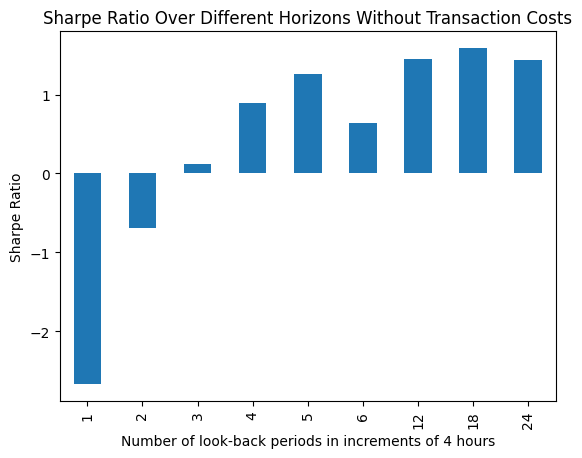

In [14]:
strat_1_gross_sr.plot(kind="bar", title="Sharpe Ratio Over Different Horizons Without Transaction Costs",
                xlabel="Number of look-back periods in increments of 4 hours",
                ylabel="Sharpe Ratio")

As we saw in the lectures, when we ignore transaction costs, we observe reversal at lower granularities (4 hours and 8 hours) but momentum at higher granularities (12 hours and higher).

In [15]:
def get_strat_1_annual_sr(strat_1_ret):
    yearly_resample = strat_1_ret.resample('YE')
    return yearly_resample.mean() / yearly_resample.std() * np.sqrt(365 * 24 / 4)

strat_1_gross_annual_sr = get_strat_1_annual_sr(strat_1_gross_daily_ret)
strat_1_gross_annual_sr

,1,2,3,4,5,6,12,18,24
2020-12-31,-3.848973,-3.929144,-1.972403,-0.150801,0.931690,-0.934529,1.385555,1.262651,1.618204
2021-12-31,-1.619153,2.232237,2.724654,2.696765,2.947196,2.088487,2.158285,2.787853,2.450617
2022-12-31,-4.248749,-2.326282,-1.958102,-0.670873,-0.582913,-0.932779,0.343887,0.992499,0.547970
2023-12-31,-1.446593,-0.012718,-0.153086,0.246768,0.935695,1.083398,1.884401,1.142865,0.721788
2024-12-31,-3.195714,-1.540009,-0.043546,0.848687,0.595175,1.149194,1.076726,0.848918,0.962606
2025-12-31,-5.117805,3.158719,1.465773,6.613002,4.624050,5.077803,7.828663,8.175743,4.606596


<Axes: title={'center': 'Sharpe Ratio Over Different Time Horizons Grouped By Year'}, xlabel='Year, number of lookback periods in increments of 4 hours', ylabel='Sharpe Ratio'>

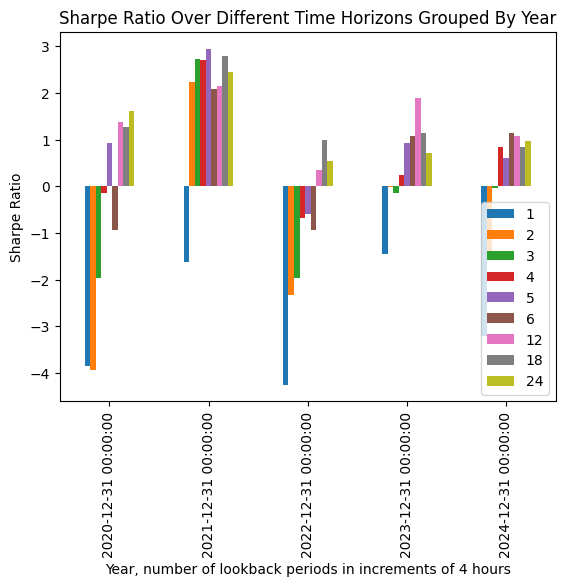

In [16]:
# Omit data from 2025 so far since it is likely too volatile to be useful over less than five days
strat_1_gross_annual_sr.iloc[:-1].plot(kind='bar',
                                       title="Sharpe Ratio Over Different Time Horizons Grouped By Year",
                                       xlabel="Year, number of lookback periods in increments of 4 hours",
                                       ylabel="Sharpe Ratio")

The strategy using a window of t=18 (3 days) seems to have a decent sharpe ratio overall (1.54) prior to
transaction costs.

### Strategy 1 With Transaction Costs

In [17]:
strat_1_net_daily_ret = get_strat_1_net_returns(strat_1_holdings, ret)
strat_1_net_daily_ret

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281,-0.003281
2020-01-01 12:00:00,-0.000485,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224
2020-01-01 16:00:00,-0.001334,-0.001384,0.001784,0.001784,0.001784,0.001784,0.001784,0.001784,0.001784
...,...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,-0.002259,-0.003436,-0.005479,-0.003460,-0.004760,-0.005126,-0.001423,0.001596,0.001596
2025-01-17 20:00:00,-0.008539,-0.011554,-0.008940,-0.006724,-0.011053,-0.007011,0.001817,0.003912,0.002591
2025-01-18 00:00:00,-0.002905,-0.007847,-0.002515,0.005140,0.004140,-0.003932,0.006135,0.003655,0.003321
2025-01-18 04:00:00,0.023492,0.017915,0.006835,0.014960,0.023784,0.023351,0.013595,0.011504,0.004131


In [18]:
strat_1_net_sr = get_strat_1_sr(strat_1_net_daily_ret)
strat_1_net_sr

1    -20.751832
2    -13.331749
3    -10.401523
4     -8.089776
5     -6.932308
6     -6.864323
12    -3.925264
18    -2.827410
24    -2.336275
dtype: float64

<Axes: title={'center': 'Sharpe Ratio For Strategy 1 Over Different Time Horizons'}>

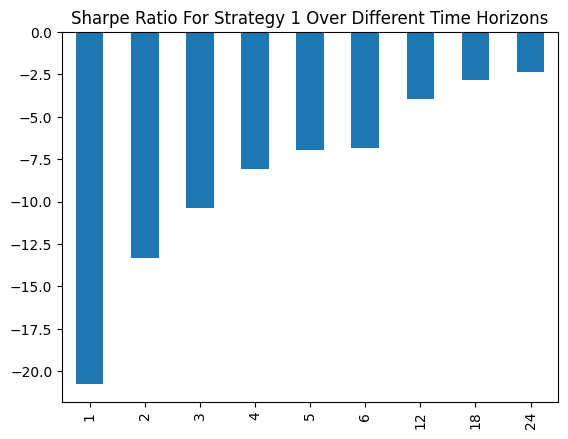

In [19]:
strat_1_net_sr.plot(kind='bar', title='Sharpe Ratio For Strategy 1 Over Different Time Horizons')

In [20]:
strat_1_annual_net_sr = get_strat_1_annual_sr(strat_1_net_daily_ret)
strat_1_annual_net_sr

,1,2,3,4,5,6,12,18,24
2020-12-31,-21.031334,-15.876341,-12.148299,-8.827155,-7.039332,-8.455215,-3.844958,-2.983348,-1.937347
2021-12-31,-13.451890,-5.703690,-3.803441,-2.787537,-2.003517,-2.446949,-1.125253,0.094664,0.260063
2022-12-31,-27.725324,-19.434049,-16.117718,-12.932315,-11.718566,-10.854681,-6.747374,-4.759926,-4.681088
2023-12-31,-28.993467,-20.106422,-17.059185,-14.046659,-11.807085,-10.529522,-6.491970,-5.637473,-5.274245
2024-12-31,-26.597023,-18.965743,-14.252453,-11.360359,-10.804976,-9.221851,-6.346870,-5.174634,-4.317617
2025-12-31,-24.709680,-11.373698,-11.818373,-4.225300,-4.182847,-2.744033,1.725006,3.471243,0.696683


<Axes: title={'center': 'Strat 1: Net Sharpe Ratios Over Different Time Horizons Grouped By Year'}>

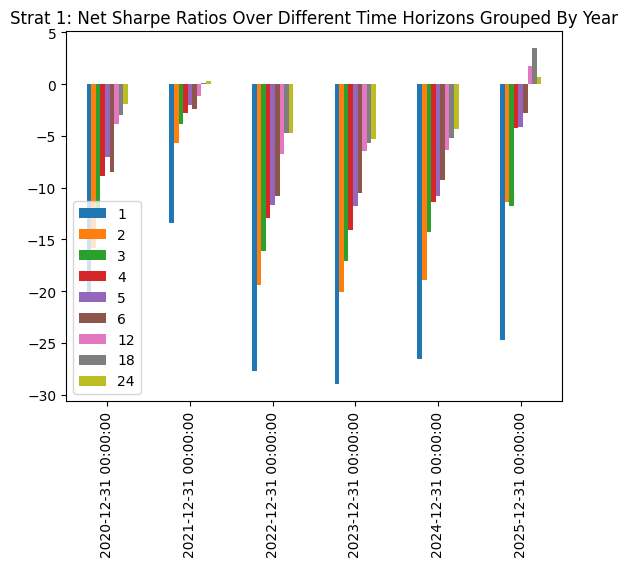

In [21]:
strat_1_annual_net_sr.plot(kind='bar',
                           title='Strat 1: Net Sharpe Ratios Over Different Time Horizons Grouped By Year')

When transaction costs are taken into account, the strategy is no longer profitable.

## Strategy 2: Testing Different Time Horizons For Momentum And Reversal -- Top Coins And Bottom Coins

Similarly to strategy 1, long high-performing coins based on average 
returns and short low-performing coins averaged over different intervals
but only do this for the top 2 and bottom 2 coins. This is similar to 
the strategy from the course where only the top and bottom deciles were
kept in the portfolio.

In [22]:
def get_strat_2_signal(ret, window_look_back):
    rolling_ranks = ret.rolling(window=window_look_back, min_periods=1).mean().rank(axis=1)
    rolling_pct_ranks = ret.rolling(window=window_look_back, min_periods=1).mean().rank(axis=1, pct=True)
    positions = ((rolling_pct_ranks > 0.81) | (rolling_pct_ranks < 0.26))
    demeaned_positions = rolling_ranks[positions].subtract(rolling_ranks[positions].mean(axis=1), axis=0)
    return demeaned_positions.divide(demeaned_positions.abs().sum(axis=1), axis=0).fillna(0)

In [23]:
get_strat_2_signal(ret, 3)

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.0,-0.5,0.500000,0.0,0.0,0.000000
2020-01-01 08:00:00,0.000000,0.500000,0.0,-0.5,0.000000,0.0,0.0,0.000000
2020-01-01 12:00:00,0.000000,0.000000,0.5,-0.5,0.000000,0.0,0.0,0.000000
2020-01-01 16:00:00,0.000000,0.000000,0.5,-0.5,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,0.318182,0.000000,0.0,0.0,-0.500000,0.0,0.0,0.181818
2025-01-17 20:00:00,0.318182,0.181818,0.0,0.0,-0.500000,0.0,0.0,0.000000
2025-01-18 00:00:00,0.000000,0.000000,0.0,-0.5,0.318182,0.0,0.0,0.181818
2025-01-18 04:00:00,0.181818,0.000000,-0.5,0.0,0.000000,0.0,0.0,0.318182


In [24]:
def get_strat_2_signal_time_horizon_dict(ret):
    strat_2_signals_data = dict()
    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        strat_2_signals_data[t] = get_strat_2_signal(ret, t)
    
    return strat_2_signals_data

strat_2_signals_data = get_strat_2_signal_time_horizon_dict(ret)
strat_2_signals_data[2]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
2020-01-01 04:00:00,0.000000,0.0,0.000000,-0.5,0.500000,0.0,0.0,0.000000
2020-01-01 08:00:00,0.000000,0.5,0.000000,-0.5,0.000000,0.0,0.0,0.000000
2020-01-01 12:00:00,0.000000,0.0,0.500000,0.0,-0.500000,0.0,0.0,0.000000
2020-01-01 16:00:00,0.000000,0.0,0.500000,-0.5,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,0.318182,0.0,0.181818,0.0,-0.500000,0.0,0.0,0.000000
2025-01-17 20:00:00,-0.500000,0.0,0.181818,0.0,0.318182,0.0,0.0,0.000000
2025-01-18 00:00:00,0.000000,0.0,0.000000,0.0,0.181818,-0.5,0.0,0.318182
2025-01-18 04:00:00,0.181818,0.0,0.000000,0.0,0.000000,-0.5,0.0,0.318182


In [25]:
def get_strat_2_gross_returns(strat_2_signals_data, ret):
    strat_2_gross_returns_data = dict()
    for t in strat_2_signals_data:
        strat_2_gross_returns_data[t] = (strat_2_signals_data[t].shift() * ret).sum(axis=1)
    return pd.DataFrame(strat_2_gross_returns_data)

strat_2_gross_returns_df = get_strat_2_gross_returns(strat_2_signals_data, ret)
strat_2_gross_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333,-0.002333
2020-01-01 12:00:00,0.002013,0.000920,0.000920,0.000920,0.000920,0.000920,0.000920,0.000920,0.000920
2020-01-01 16:00:00,-0.000588,-0.000588,0.003089,0.003089,0.003089,0.003089,0.003089,0.003089,0.003089
...,...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,0.000240,-0.001079,-0.003877,-0.001079,0.000240,-0.001079,0.000814,0.002889,0.002889
2025-01-17 20:00:00,-0.008134,-0.013308,-0.011153,-0.011153,-0.012651,-0.010654,0.000866,0.005437,0.003282
2025-01-18 00:00:00,-0.006228,-0.006045,0.000709,0.004619,0.004619,-0.006356,0.010271,0.007488,0.007488
2025-01-18 04:00:00,0.033758,0.028046,0.002969,0.012965,0.035514,0.035514,0.015742,0.015742,0.002969


In [26]:
def get_strat_2_net_returns(strat_2_signals_data, ret):
    strat_2_net_returns_dict = dict()
    for t in strat_2_signals_data:
        strat_2_net_returns_dict[t] = get_net_return(strat_2_signals_data[t].shift(), ret)
    return pd.DataFrame(strat_2_net_returns_dict)

strat_2_net_returns_df = get_strat_2_net_returns(strat_2_signals_data, ret)
strat_2_net_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333,-0.004333
2020-01-01 12:00:00,-0.001987,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080,-0.001080
2020-01-01 16:00:00,-0.002588,-0.004588,0.001089,0.001089,0.001089,0.001089,0.001089,0.001089,0.001089
...,...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,-0.001033,-0.002351,-0.004604,-0.002351,-0.001760,-0.005079,0.000269,0.002889,0.002162
2025-01-17 20:00:00,-0.011407,-0.014035,-0.011698,-0.011153,-0.013378,-0.011381,-0.001679,0.005437,0.002555
2025-01-18 00:00:00,-0.010228,-0.009318,-0.000018,0.003346,0.002619,-0.007629,0.008998,0.007488,0.006761
2025-01-18 04:00:00,0.029758,0.024773,-0.001031,0.009692,0.034786,0.033514,0.013014,0.015196,0.002969


In [27]:
def get_strat_2_results_stats(strat_2_gross_returns_df, strat_2_net_returns_df, periods_per_day):
    strat_2_results_stats = dict()
    strat_2_results_stats["gross_mean"] = strat_2_gross_returns_df.mean() * 365 * periods_per_day
    strat_2_results_stats["net_mean"] = strat_2_net_returns_df.mean() * 365 * periods_per_day
    strat_2_results_stats["gross_std"] = strat_2_gross_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_2_results_stats["net_std"] = strat_2_net_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_2_results_stats["gross_sr"] = strat_2_results_stats["gross_mean"] / strat_2_results_stats["net_mean"]
    strat_2_results_stats["net_sr"] = strat_2_results_stats["net_mean"] / strat_2_results_stats["net_std"]
    
    strat_2_results_stats_df = pd.DataFrame(strat_2_results_stats)
    return strat_2_results_stats_df
    
get_strat_2_results_stats(strat_2_gross_returns_df, strat_2_net_returns_df, 6)

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-1.149611,-8.091956,0.451387,0.454636,0.142068,-17.798755
2,-0.309202,-5.450088,0.451280,0.455766,0.056733,-11.958072
3,0.006783,-4.319179,0.460403,0.465714,-0.001570,-9.274313
4,0.395943,-3.394601,0.464988,0.469155,-0.116639,-7.235562
5,0.532137,-2.867547,0.458281,0.461037,-0.185572,-6.219770
6,0.348946,-2.799887,0.464716,0.468519,-0.124629,-5.976032
12,0.568459,-1.721084,0.471732,0.474215,-0.330291,-3.629335
18,0.539389,-1.321680,0.461458,0.464260,-0.408109,-2.846854
24,0.598722,-1.014739,0.461803,0.464814,-0.590025,-2.183106


In [28]:
def get_strat_2_results(ret, periods_per_day):
    strat_2_signals_data = get_strat_2_signal_time_horizon_dict(ret)
    strat_2_gross_returns_df = get_strat_2_gross_returns(strat_2_signals_data, ret)
    strat_2_net_returns_df = get_strat_2_net_returns(strat_2_signals_data, ret)
    return get_strat_2_results_stats(strat_2_gross_returns_df, strat_2_net_returns_df, periods_per_day)

In [29]:
# Rebalance every 4 hours

strat_2_4hr_trades = get_strat_2_results(ret, 6)
strat_2_4hr_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-1.149611,-8.091956,0.451387,0.454636,0.142068,-17.798755
2,-0.309202,-5.450088,0.451280,0.455766,0.056733,-11.958072
3,0.006783,-4.319179,0.460403,0.465714,-0.001570,-9.274313
4,0.395943,-3.394601,0.464988,0.469155,-0.116639,-7.235562
5,0.532137,-2.867547,0.458281,0.461037,-0.185572,-6.219770
6,0.348946,-2.799887,0.464716,0.468519,-0.124629,-5.976032
12,0.568459,-1.721084,0.471732,0.474215,-0.330291,-3.629335
18,0.539389,-1.321680,0.461458,0.464260,-0.408109,-2.846854
24,0.598722,-1.014739,0.461803,0.464814,-0.590025,-2.183106


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Every 4 Hours'}>

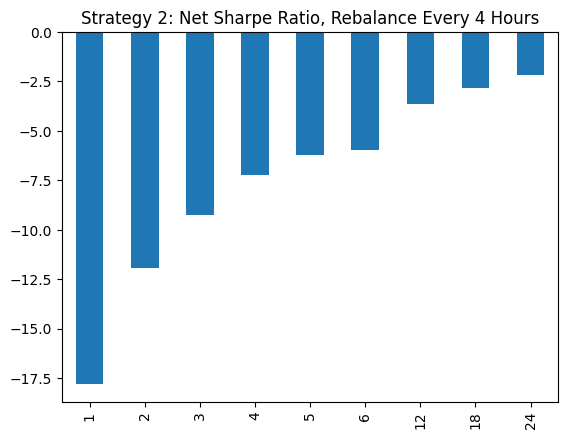

In [30]:
strat_2_4hr_trades["net_sr"].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Every 4 Hours')

In [31]:
# Rebalance every 8 hours

strat_2_8hr_trades = get_strat_2_results(ret.iloc[::2], 3)
strat_2_8hr_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.278528,-3.093291,0.328109,0.330960,-0.090043,-9.346413
2,0.426556,-2.040576,0.319893,0.321743,-0.209037,-6.342258
3,0.324200,-1.721093,0.334873,0.337306,-0.188369,-5.102464
4,0.479485,-1.286473,0.329251,0.331321,-0.372713,-3.882861
5,0.529201,-1.084905,0.333418,0.335495,-0.487785,-3.233749
6,0.581494,-0.868007,0.335489,0.336715,-0.669919,-2.577868
12,0.441469,-0.572169,0.318222,0.319948,-0.771571,-1.788319
18,0.332202,-0.507365,0.326319,0.327803,-0.654760,-1.547775
24,0.358793,-0.358079,0.330488,0.331563,-1.001993,-1.079973


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Every 8 Hours'}>

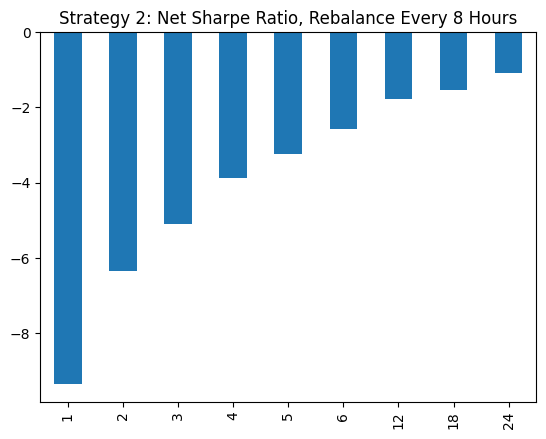

In [32]:
strat_2_8hr_trades["net_sr"].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Every 8 Hours')

In [33]:
# Rebalance every 12 hours

strat_2_12hr_trades = get_strat_2_results(ret.iloc[::3], 2)
strat_2_12hr_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.282919,-1.947393,0.267312,0.268500,-0.145281,-7.252846
2,0.103378,-1.549573,0.274087,0.275286,-0.066714,-5.628963
3,0.084468,-1.274977,0.272315,0.274393,-0.066250,-4.646528
4,0.181776,-0.988852,0.274168,0.275052,-0.183825,-3.595144
5,0.118714,-0.951313,0.275161,0.276968,-0.124790,-3.434741
6,0.077444,-0.905553,0.274925,0.276211,-0.085521,-3.278485
12,0.078387,-0.629459,0.264240,0.265390,-0.124530,-2.371824
18,0.046733,-0.542945,0.266937,0.267762,-0.086074,-2.027713
24,0.172990,-0.335189,0.280440,0.280968,-0.516096,-1.192981


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Every 12 Hours'}>

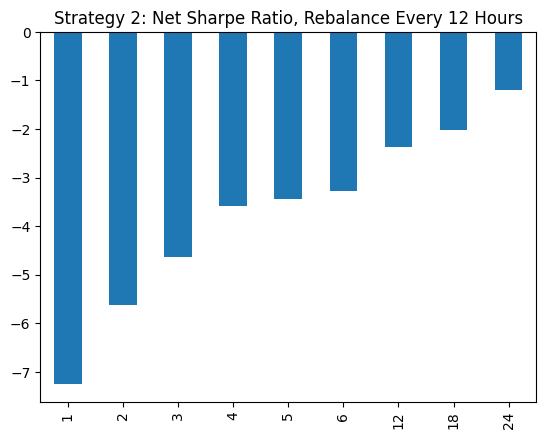

In [34]:
strat_2_12hr_trades['net_sr'].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Every 12 Hours')

In [35]:
# Rebalance once a day
strat_2_1d_trades = get_strat_2_results(ret.iloc[::6], 1)
strat_2_1d_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.010812,-1.116648,0.180492,0.181710,-0.009682,-6.145229
2,0.086251,-0.728889,0.181957,0.183754,-0.118332,-3.966662
3,0.121223,-0.555728,0.180112,0.181605,-0.218133,-3.060086
4,-0.011420,-0.617122,0.179828,0.182138,0.018506,-3.388216
5,0.078028,-0.457862,0.182512,0.183919,-0.170419,-2.489480
6,0.094359,-0.396078,0.182580,0.184507,-0.238233,-2.146683
12,0.069010,-0.273530,0.190270,0.192701,-0.252292,-1.419455
18,0.118936,-0.157795,0.190009,0.191698,-0.753741,-0.823142
24,0.110980,-0.138765,0.189806,0.191484,-0.799764,-0.724685


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Once A Day'}>

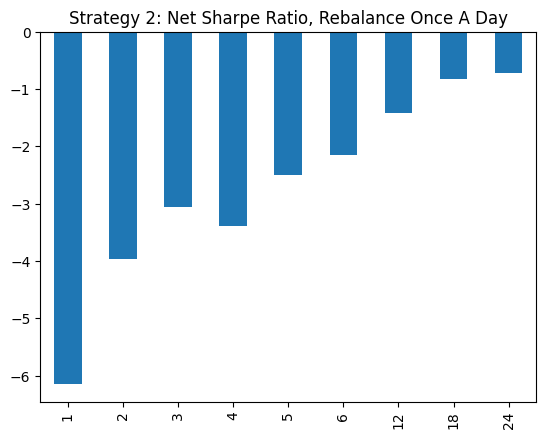

In [36]:
strat_2_1d_trades['net_sr'].plot(kind='bar', title='Strategy 2: Net Sharpe Ratio, Rebalance Once A Day')

In [37]:
# Rebalance once every two days

strat_2_2d_trades = get_strat_2_results(ret.iloc[::12], 0.5)
strat_2_2d_trades

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.037059,-0.529468,0.130426,0.130370,-0.069993,-4.061271
2,-0.028378,-0.444272,0.128692,0.128724,0.063876,-3.451344
3,0.023723,-0.310501,0.130172,0.131641,-0.076401,-2.358698
4,-0.024069,-0.316819,0.133619,0.135275,0.075972,-2.342041
5,-0.033886,-0.294071,0.132842,0.133696,0.115230,-2.199551
6,-0.000328,-0.240246,0.138699,0.140138,0.001363,-1.714350
12,-0.010849,-0.191878,0.131249,0.131725,0.056540,-1.456658
18,0.022295,-0.116038,0.129095,0.130025,-0.192136,-0.892427
24,0.041454,-0.078439,0.119386,0.119599,-0.528480,-0.655854


<Axes: title={'center': 'Strategy 2: Net Sharpe Ratio, Rebalance Once Every Two Days'}>

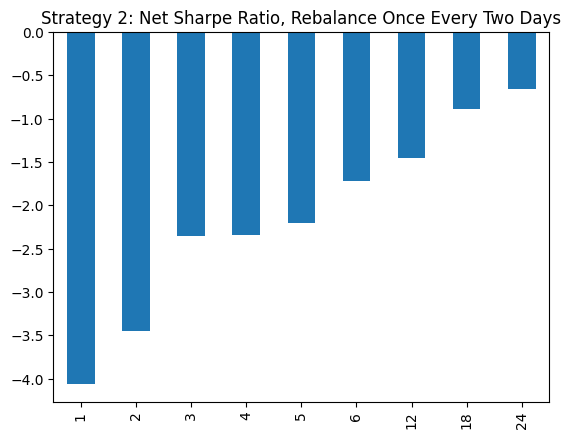

In [38]:
strat_2_2d_trades['net_sr'].plot(kind='bar',
                                 title='Strategy 2: Net Sharpe Ratio, Rebalance Once Every Two Days')

## Strategy 3: Testing With The Most Recent Interval Removed

Similar to strategy 1: difference is to not include most recent 
period in rolling window.

In [39]:
def get_strat_3_signal(ret, window_look_back):
    ranked_avgs = ret.rolling(window=window_look_back, min_periods=1).mean().shift().rank(axis=1)
    demeaned_ranked_avgs = ranked_avgs.subtract(ranked_avgs.mean(axis=1), axis=0)
    return demeaned_ranked_avgs.divide(demeaned_ranked_avgs.abs().sum(axis=1), axis=0)

get_strat_3_signal(ret, 4)

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,-0.166667,0.000000,0.166667,-0.333333,0.333333,NaN,NaN,NaN
2020-01-01 12:00:00,-0.166667,0.333333,0.166667,-0.333333,0.000000,NaN,NaN,NaN
2020-01-01 16:00:00,-0.166667,0.166667,0.333333,-0.333333,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,0.250000,0.000000,-0.166667,-0.083333,-0.250000,0.083333,NaN,0.166667
2025-01-17 20:00:00,0.250000,0.000000,-0.083333,-0.166667,-0.250000,0.083333,NaN,0.166667
2025-01-18 00:00:00,0.083333,0.166667,-0.083333,-0.166667,-0.250000,0.000000,NaN,0.250000
2025-01-18 04:00:00,0.250000,0.083333,0.000000,-0.250000,-0.083333,-0.166667,NaN,0.166667


In [40]:
def get_strat_3_signal_time_horizon_dict(ret):
    strat_3_signal_dict = dict()
    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        strat_3_signal_dict[t] = get_strat_3_signal(ret, t)
    return strat_3_signal_dict

strat_3_signals_data = get_strat_3_signal_time_horizon_dict(ret)
strat_3_signals_data[4]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,-0.166667,0.000000,0.166667,-0.333333,0.333333,NaN,NaN,NaN
2020-01-01 12:00:00,-0.166667,0.333333,0.166667,-0.333333,0.000000,NaN,NaN,NaN
2020-01-01 16:00:00,-0.166667,0.166667,0.333333,-0.333333,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,0.250000,0.000000,-0.166667,-0.083333,-0.250000,0.083333,NaN,0.166667
2025-01-17 20:00:00,0.250000,0.000000,-0.083333,-0.166667,-0.250000,0.083333,NaN,0.166667
2025-01-18 00:00:00,0.083333,0.166667,-0.083333,-0.166667,-0.250000,0.000000,NaN,0.250000
2025-01-18 04:00:00,0.250000,0.083333,0.000000,-0.250000,-0.083333,-0.166667,NaN,0.166667


In [41]:
def get_strat_3_gross_returns(strat_3_signals_data, ret):
    strat_3_gross_returns_data = dict()
    for t in strat_3_signals_data:
        strat_3_gross_returns_data[t] = (strat_3_signals_data[t] * ret).sum(axis=1)
    return pd.DataFrame(strat_3_gross_returns_data)

strat_3_gross_returns_df = get_strat_3_gross_returns(strat_3_signals_data, ret)
strat_3_gross_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,-1.281039e-03,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281,-0.001281
2020-01-01 12:00:00,2.181741e-03,0.001558,0.001558,0.001558,0.001558,0.001558,0.001558,0.001558,0.001558
2020-01-01 16:00:00,-7.816796e-07,0.000616,0.002451,0.002451,0.002451,0.002451,0.002451,0.002451,0.002451
...,...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,-2.590047e-04,-0.002436,-0.004145,-0.001793,-0.002427,-0.001793,-0.000423,0.001929,0.001929
2025-01-17 20:00:00,-5.538759e-03,-0.009887,-0.007607,-0.006390,-0.009053,-0.006011,0.003151,0.003912,0.002924
2025-01-18 00:00:00,7.614150e-04,-0.005180,-0.001515,0.006140,0.006140,-0.002599,0.006802,0.003988,0.003988
2025-01-18 04:00:00,2.615865e-02,0.020582,0.009835,0.016627,0.024450,0.024685,0.014595,0.012504,0.004464


In [42]:
def get_strat_3_net_returns(strat_3_signals_data, ret):
    strat_3_net_returns_data = dict()
    for t in strat_3_signals_data:
        strat_3_net_returns_data[t] = get_net_return(strat_3_signals_data[t].shift(), ret)
    return pd.DataFrame(strat_3_net_returns_data)

strat_3_net_returns_df = get_strat_3_net_returns(strat_3_signals_data, ret)
strat_3_net_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 12:00:00,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784,-0.001784
2020-01-01 16:00:00,-0.002072,0.001096,0.001096,0.001096,0.001096,0.001096,0.001096,0.001096,0.001096
...,...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,-0.009377,-0.009048,-0.007451,-0.009890,-0.006377,0.004594,0.000050,0.000157,0.003950
2025-01-17 20:00:00,-0.008011,-0.006020,-0.004354,-0.007602,-0.007504,-0.009269,0.001616,0.003579,0.003579
2025-01-18 00:00:00,-0.007113,-0.005363,0.005078,0.005995,-0.003837,-0.002097,0.004566,0.005606,0.002714
2025-01-18 04:00:00,-0.002568,-0.022117,-0.003789,0.021845,0.020845,-0.000540,0.013226,0.002291,0.001958


In [43]:
def get_strat_3_results_stats(strat_3_gross_returns_df, strat_3_net_returns_df, periods_per_day):
    strat_3_results_stats_data = dict()
    strat_3_results_stats_data["gross_mean"] = strat_3_gross_returns_df.mean() * 365 * periods_per_day
    strat_3_results_stats_data["net_mean"] = strat_3_net_returns_df.mean() * 365 * periods_per_day
    strat_3_results_stats_data["gross_std"] = strat_3_gross_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_3_results_stats_data["net_std"] = strat_3_net_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_3_results_stats_data["gross_sr"] = \
        strat_3_results_stats_data["gross_mean"] / strat_3_results_stats_data["gross_std"]
    strat_3_results_stats_data["net_sr"] = \
        strat_3_results_stats_data["net_mean"] / strat_3_results_stats_data["net_std"]
    
    return pd.DataFrame(strat_3_results_stats_data)

get_strat_3_results_stats(strat_3_gross_returns_df, strat_3_net_returns_df, 6)

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-0.870333,-5.605829,0.325797,0.328546,-2.671399,-17.062545
2,-0.230915,-3.716104,0.332071,0.327717,-0.695378,-11.339378
3,0.038634,-2.773030,0.332868,0.331687,0.116066,-8.360380
4,0.305418,-2.345097,0.340237,0.332471,0.897663,-7.053529
5,0.423153,-2.262333,0.336881,0.333991,1.256091,-6.773644
6,0.217148,-2.033764,0.339412,0.330139,0.639779,-6.160327
12,0.491797,-1.203481,0.337854,0.333188,1.455649,-3.612019
18,0.529734,-0.817488,0.333442,0.329229,1.588686,-2.483039
24,0.484329,-0.664414,0.337445,0.333960,1.435282,-1.989502


In [44]:
def get_strat_3_results(ret, periods_per_day):
    strat_3_signals_data = get_strat_3_signal_time_horizon_dict(ret)
    strat_3_gross_rets_df = get_strat_3_gross_returns(strat_3_signals_data, ret)
    strat_3_net_rets_df = get_strat_3_net_returns(strat_3_signals_data, ret)
    return get_strat_3_results_stats(strat_3_gross_rets_df, strat_3_net_rets_df, periods_per_day)

In [45]:
# Rebalance every 4 hours
strat_3_4hr_results = get_strat_3_results(ret, 6)
strat_3_4hr_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-0.870333,-5.605829,0.325797,0.328546,-2.671399,-17.062545
2,-0.230915,-3.716104,0.332071,0.327717,-0.695378,-11.339378
3,0.038634,-2.773030,0.332868,0.331687,0.116066,-8.360380
4,0.305418,-2.345097,0.340237,0.332471,0.897663,-7.053529
5,0.423153,-2.262333,0.336881,0.333991,1.256091,-6.773644
6,0.217148,-2.033764,0.339412,0.330139,0.639779,-6.160327
12,0.491797,-1.203481,0.337854,0.333188,1.455649,-3.612019
18,0.529734,-0.817488,0.333442,0.329229,1.588686,-2.483039
24,0.484329,-0.664414,0.337445,0.333960,1.435282,-1.989502


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Every 4 Hours'}>

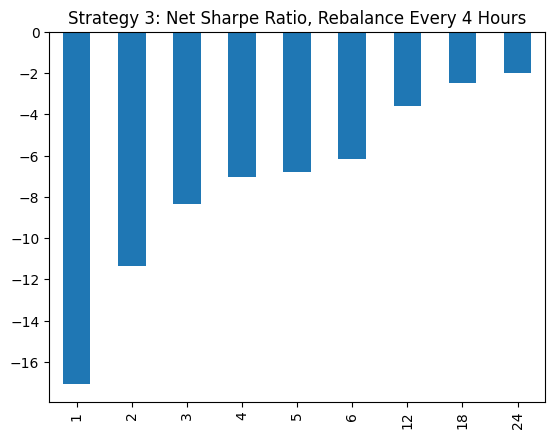

In [46]:
strat_3_4hr_results['net_sr'].plot(kind='bar', title='Strategy 3: Net Sharpe Ratio, Rebalance Every 4 Hours')

In [47]:
strat_3_net_sr_by_year = strat_3_net_returns_df.resample('YE').mean() / strat_3_net_returns_df.std() * np.sqrt(365 * 6)
strat_3_net_sr_by_year

,1,2,3,4,5,6,12,18,24
2020-12-31,-19.671554,-11.801069,-8.817810,-6.101674,-7.874139,-7.464194,-3.932138,-2.199344,-0.875701
2021-12-31,-12.506583,-7.346760,-5.013108,-4.256153,-4.079880,-3.503006,-1.234627,0.172590,0.123004
2022-12-31,-18.104143,-12.867369,-9.760380,-8.488029,-7.567056,-6.893292,-4.569055,-3.103193,-2.808872
2023-12-31,-17.554516,-13.038720,-9.965217,-8.452318,-7.598903,-6.438774,-4.209414,-3.695230,-3.451380
2024-12-31,-17.626533,-11.706219,-8.518189,-8.119509,-6.930280,-6.688088,-4.445464,-3.793192,-3.070956
2025-12-31,-13.740051,-9.972853,-2.635305,-3.917686,-2.905046,-2.182090,3.349273,1.813309,0.853416


<Axes: >

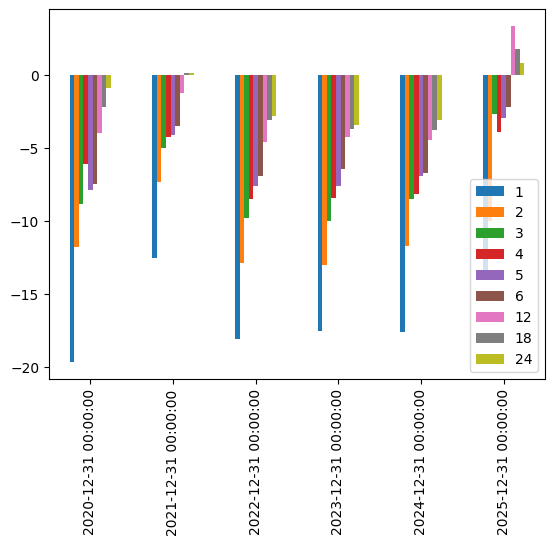

In [48]:
strat_3_net_sr_by_year.plot(kind='bar')

In [49]:
# Rebalance every 8 hours

strat_3_8hr_results = get_strat_3_results(ret.iloc[::2], 3)
strat_3_8hr_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.203274,-2.621813,0.237885,0.228789,0.854503,-11.459529
2,0.294973,-1.866909,0.234108,0.239519,1.259990,-7.794419
3,0.242669,-1.486214,0.243597,0.240369,0.996191,-6.183048
4,0.330105,-1.278676,0.240589,0.238005,1.372073,-5.372472
5,0.420129,-1.041601,0.242283,0.240351,1.734037,-4.333672
6,0.427442,-0.916718,0.241585,0.235667,1.769324,-3.889885
12,0.311667,-0.638727,0.230384,0.232358,1.352816,-2.748899
18,0.211964,-0.524177,0.236983,0.233578,0.894425,-2.244118
24,0.293815,-0.416814,0.237724,0.235279,1.235949,-1.771571


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Every 8 Hours'}>

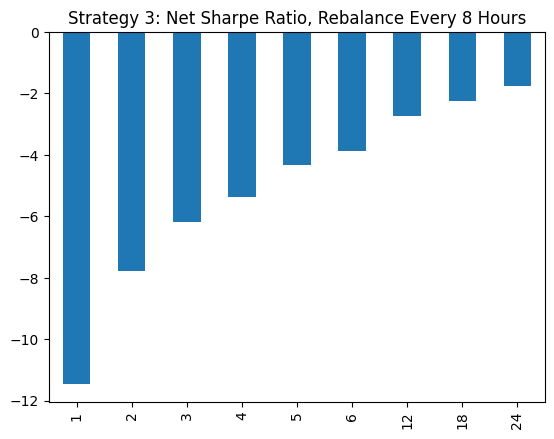

In [50]:
strat_3_8hr_results["net_sr"].plot(kind='bar', title='Strategy 3: Net Sharpe Ratio, Rebalance Every 8 Hours')

In [51]:
# Rebalance every 12 hours

strat_3_12hr_results = get_strat_3_results(ret.iloc[::3], 2)
strat_3_12hr_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.204927,-1.974039,0.196224,0.199092,1.044351,-9.915202
2,0.080545,-1.391973,0.199791,0.205987,0.403148,-6.757559
3,0.070528,-1.138533,0.199746,0.198970,0.353087,-5.722147
4,0.104918,-1.031370,0.200890,0.203685,0.522265,-5.063549
5,0.058129,-0.901783,0.201857,0.203921,0.287970,-4.422223
6,0.054796,-0.828473,0.201628,0.202507,0.271768,-4.091082
12,0.082038,-0.587590,0.194164,0.194628,0.422520,-3.019046
18,0.030999,-0.435226,0.196313,0.200310,0.157904,-2.172766
24,0.161171,-0.352567,0.202593,0.199794,0.795540,-1.764651


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Every 12 Hours'}>

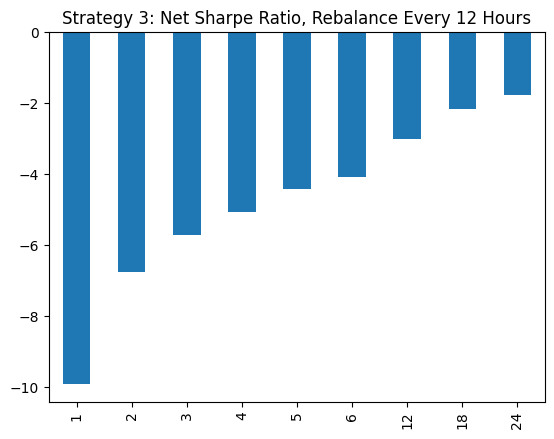

In [52]:
strat_3_12hr_results["net_sr"].plot(kind='bar', title='Strategy 3: Net Sharpe Ratio, Rebalance Every 12 Hours')

In [53]:
# Rebalance once a day

strat_3_1d_results = get_strat_3_results(ret.iloc[::6], 1)
strat_3_1d_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,-0.001103,-0.874133,0.135507,0.129794,-0.008139,-6.734770
2,0.081518,-0.550834,0.131972,0.129276,0.617689,-4.260910
3,0.055457,-0.480240,0.131861,0.126732,0.420575,-3.789422
4,-0.008574,-0.406620,0.128417,0.127867,-0.066768,-3.180016
5,0.023696,-0.327862,0.130556,0.132081,0.181502,-2.482272
6,0.042597,-0.275853,0.132661,0.131933,0.321095,-2.090867
12,0.052679,-0.136720,0.138575,0.128022,0.380145,-1.067946
18,0.107266,-0.104035,0.136409,0.133618,0.786353,-0.778598
24,0.095306,-0.073687,0.134717,0.129725,0.707455,-0.568026


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Once A Day'}>

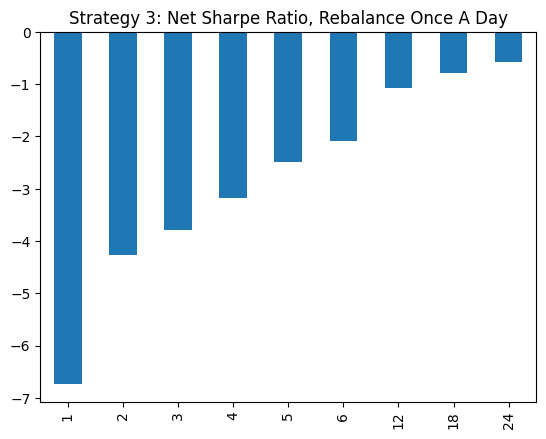

In [54]:
strat_3_1d_results['net_sr'].plot(kind='bar', title="Strategy 3: Net Sharpe Ratio, Rebalance Once A Day")

In [55]:
strat_3_2d_results = get_strat_3_results(ret.iloc[::12], 0.5)
strat_3_2d_results

,gross_mean,net_mean,gross_std,net_std,gross_sr,net_sr
1,0.064748,-0.442307,0.096241,0.094437,0.672771,-4.683632
2,0.037598,-0.353960,0.095787,0.094209,0.392515,-3.757163
3,0.029477,-0.294184,0.097102,0.091482,0.303566,-3.215753
4,-0.017304,-0.266137,0.094540,0.089766,-0.183030,-2.964787
5,-0.017147,-0.219094,0.096069,0.098278,-0.178480,-2.229333
6,-0.007827,-0.211483,0.098815,0.100390,-0.079206,-2.106612
12,0.009655,-0.123841,0.099609,0.095867,0.096924,-1.291801
18,0.038266,-0.076925,0.094859,0.095468,0.403394,-0.805769
24,0.030901,-0.048076,0.097319,0.097196,0.317526,-0.494629


<Axes: title={'center': 'Strategy 3: Net Sharpe Ratio, Rebalance Once Every Two Days'}>

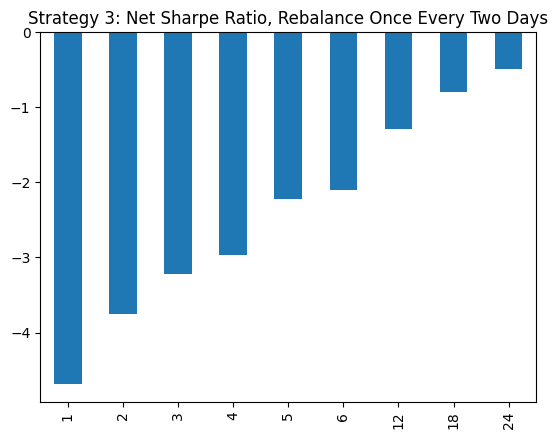

In [56]:
strat_3_2d_results['net_sr'].plot(kind='bar',
                                  title='Strategy 3: Net Sharpe Ratio, Rebalance Once Every Two Days')

## Strategy 4: Trade Around Periods Of High Volume With New Information

Use high volume as a signal for high activity. When this is coupled with activity (e.g. look up on Twitter), then this could combine to yield momentum.

Try using exponential decay for the moving average: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html

In [57]:
def get_strat_4_signal(volume_df, window_look_back):
    volume_change = (volume_df / volume_df.shift() - 1).rolling(window=window_look_back, min_periods=1).mean()
    demeaned_volume_change = volume_change.rank(axis=1).subtract(volume_change.rank(axis=1).mean(axis=1), axis=0)
    return demeaned_volume_change.divide(demeaned_volume_change.abs().sum(axis=1), axis=0)

get_strat_4_signal(volume_df, 6)

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.166667,0.000000,0.333333,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 08:00:00,0.000000,0.166667,-0.333333,0.333333,-0.166667,NaN,NaN,NaN
2020-01-01 12:00:00,0.333333,0.000000,-0.166667,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 16:00:00,0.166667,-0.166667,-0.333333,0.000000,0.333333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,0.166667,-0.166667,-0.083333,0.000000,-0.250000,0.25,NaN,0.083333
2025-01-17 20:00:00,0.166667,-0.166667,-0.083333,0.083333,-0.250000,0.25,NaN,0.000000
2025-01-18 00:00:00,-0.166667,-0.083333,0.000000,0.083333,-0.250000,0.25,NaN,0.166667
2025-01-18 04:00:00,0.000000,-0.250000,-0.083333,-0.166667,0.083333,0.25,NaN,0.166667


In [58]:
def get_strat_4_signal_time_horizon_dict(volume_df):
    strat_4_signal_dict = dict()
    for t in [1, 2, 3, 4, 5, 6, 12, 18, 24]:
        strat_4_signal_dict[t] = get_strat_4_signal(volume_df, t)
    return strat_4_signal_dict

strat_4_signals_data = get_strat_4_signal_time_horizon_dict(volume_df)
strat_4_signals_data[6]

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.166667,0.000000,0.333333,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 08:00:00,0.000000,0.166667,-0.333333,0.333333,-0.166667,NaN,NaN,NaN
2020-01-01 12:00:00,0.333333,0.000000,-0.166667,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 16:00:00,0.166667,-0.166667,-0.333333,0.000000,0.333333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,0.166667,-0.166667,-0.083333,0.000000,-0.250000,0.25,NaN,0.083333
2025-01-17 20:00:00,0.166667,-0.166667,-0.083333,0.083333,-0.250000,0.25,NaN,0.000000
2025-01-18 00:00:00,-0.166667,-0.083333,0.000000,0.083333,-0.250000,0.25,NaN,0.166667
2025-01-18 04:00:00,0.000000,-0.250000,-0.083333,-0.166667,0.083333,0.25,NaN,0.166667


In [59]:
def get_strat_4_gross_returns(strat_4_signals_data, ret):
    strat_4_gross_returns_data = dict()
    for t in strat_4_signals_data:
        strat_4_gross_returns_data[t] = (strat_4_signals_data[t].shift() * ret).sum(axis=1)
    return pd.DataFrame(strat_4_gross_returns_data)

strat_4_gross_returns_df = get_strat_4_gross_returns(strat_4_signals_data, ret)
strat_4_gross_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,0.002469,0.002469,0.002469,0.002469,0.002469,0.002469,0.002469,0.002469,0.002469
2020-01-01 12:00:00,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008,-0.001008
2020-01-01 16:00:00,-0.000210,-0.001239,-0.002248,-0.002248,-0.002248,-0.002248,-0.002248,-0.002248,-0.002248
...,...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,-0.002514,-0.000471,-0.004214,-0.001583,-0.002999,-0.002967,0.000791,-0.000435,0.000364
2025-01-17 20:00:00,-0.005153,-0.004305,-0.005056,-0.003135,-0.007820,-0.007287,-0.007385,-0.006930,-0.005889
2025-01-18 00:00:00,-0.013000,-0.010475,-0.005111,0.001121,0.000005,-0.000509,-0.004200,0.002752,-0.000500
2025-01-18 04:00:00,0.022025,0.004726,0.007619,0.012372,0.015206,0.012818,0.013879,0.009241,0.006006


In [60]:
def get_strat_4_net_returns(strat_4_signals_data, ret):
    strat_4_net_returns_data = dict()
    for t in strat_4_signals_data:
        strat_4_net_returns_data[t] = get_net_return(strat_4_signals_data[t].shift(), ret)
    return pd.DataFrame(strat_4_net_returns_data)

strat_4_net_returns_df = get_strat_4_net_returns(strat_4_signals_data, ret)
strat_4_net_returns_df

,1,2,3,4,5,6,12,18,24
2020-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-01 08:00:00,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469,0.000469
2020-01-01 12:00:00,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674,-0.003674
2020-01-01 16:00:00,-0.002876,-0.003239,-0.004248,-0.004248,-0.004248,-0.004248,-0.004248,-0.004248,-0.004248
...,...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,-0.005514,-0.002471,-0.005881,-0.002583,-0.003999,-0.004634,0.000791,-0.001102,0.000031
2025-01-17 20:00:00,-0.007486,-0.006305,-0.005723,-0.003802,-0.008820,-0.007954,-0.007718,-0.007930,-0.005889
2025-01-18 00:00:00,-0.016000,-0.013475,-0.006778,0.000121,-0.000995,-0.000842,-0.005533,0.002752,-0.000833
2025-01-18 04:00:00,0.019025,0.003060,0.005619,0.012039,0.014540,0.011484,0.013212,0.008907,0.005672


In [61]:
# strat_4_net_returns_df.mean()

def get_strat_4_results_stats(strat_4_gross_returns_df, strat_4_net_returns_df, periods_per_day):
    strat_4_results_stats_data = dict()
    strat_4_results_stats_data["gross_mean"] = strat_4_gross_returns_df.mean() * 365 * periods_per_day
    strat_4_results_stats_data["gross_std"] = strat_4_gross_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_4_results_stats_data["net_mean"] = strat_4_net_returns_df.mean() * 365 * periods_per_day
    strat_4_results_stats_data["net_std"] = strat_4_net_returns_df.std() * np.sqrt(365 * periods_per_day)
    strat_4_results_stats_data["gross_sr"] = strat_4_results_stats_data["gross_mean"] / strat_4_results_stats_data["gross_std"]
    strat_4_results_stats_data["net_sr"] = strat_4_results_stats_data["net_mean"] / strat_4_results_stats_data["net_std"]
    return pd.DataFrame(strat_4_results_stats_data)

get_strat_4_results_stats(strat_4_gross_returns_df, strat_4_net_returns_df, 6)

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.044354,0.295454,-6.834171,0.297160,0.150122,-22.998302
2,0.305941,0.295258,-4.629510,0.298875,1.036184,-15.489806
3,0.200183,0.296527,-3.797122,0.300388,0.675092,-12.640736
4,0.254179,0.295736,-3.231617,0.299703,0.859480,-10.782742
5,0.307006,0.294082,-2.760602,0.297355,1.043949,-9.283865
6,0.396704,0.299353,-2.257129,0.301957,1.325206,-7.475005
12,0.228744,0.299788,-1.482695,0.301425,0.763017,-4.918951
18,0.049153,0.301434,-1.219641,0.302317,0.163062,-4.034315
24,-0.021627,0.304449,-1.029162,0.305769,-0.071037,-3.365811


In [62]:
def get_strat_4_results(ret, volume_df, periods_per_day):
    strat_4_signals_data = get_strat_4_signal_time_horizon_dict(volume_df)
    strat_4_gross_returns_df = get_strat_4_gross_returns(strat_4_signals_data, ret)
    strat_4_net_returns_df = get_strat_4_net_returns(strat_4_signals_data, ret)
    return get_strat_4_results_stats(strat_4_gross_returns_df, strat_4_net_returns_df, periods_per_day)

In [63]:
strat_4_4hr_results = get_strat_4_results(ret, volume_df, 6)
strat_4_4hr_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.044354,0.295454,-6.834171,0.297160,0.150122,-22.998302
2,0.305941,0.295258,-4.629510,0.298875,1.036184,-15.489806
3,0.200183,0.296527,-3.797122,0.300388,0.675092,-12.640736
4,0.254179,0.295736,-3.231617,0.299703,0.859480,-10.782742
5,0.307006,0.294082,-2.760602,0.297355,1.043949,-9.283865
6,0.396704,0.299353,-2.257129,0.301957,1.325206,-7.475005
12,0.228744,0.299788,-1.482695,0.301425,0.763017,-4.918951
18,0.049153,0.301434,-1.219641,0.302317,0.163062,-4.034315
24,-0.021627,0.304449,-1.029162,0.305769,-0.071037,-3.365811


<Axes: title={'center': 'Strategy 4: Net Sharpe Ratio, Rebalance Every 4 Hours'}>

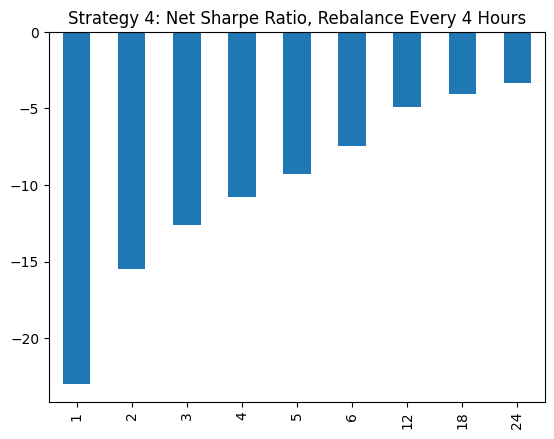

In [64]:
strat_4_4hr_results["net_sr"].plot(kind='bar', title='Strategy 4: Net Sharpe Ratio, Rebalance Every 4 Hours')

In [65]:
strat_4_8hr_results = get_strat_4_results(ret[::2], volume_df[::2], 3)
strat_4_8hr_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.105789,0.216550,-3.417172,0.217111,0.488518,-15.739277
2,0.059930,0.213154,-2.412908,0.215780,0.281158,-11.182244
3,0.139815,0.217961,-1.710630,0.220232,0.641467,-7.767398
4,0.156054,0.217189,-1.486754,0.219571,0.718515,-6.771183
5,0.239324,0.217573,-1.232825,0.219714,1.099972,-5.611048
6,0.241058,0.219006,-0.997723,0.220872,1.100694,-4.517198
12,0.169329,0.220624,-0.602507,0.221586,0.767497,-2.719066
18,0.124464,0.214509,-0.443589,0.215351,0.580229,-2.059842
24,0.143212,0.214315,-0.323607,0.214937,0.668235,-1.505587


<Axes: title={'center': 'Strategy 4: Net Sharpe Ratio, Rebalance Every 8 Hours'}>

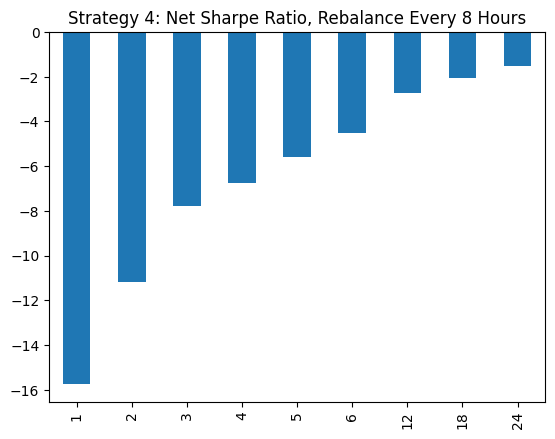

In [66]:
strat_4_8hr_results['net_sr'].plot(kind='bar', title='Strategy 4: Net Sharpe Ratio, Rebalance Every 8 Hours')

In [67]:
strat_4_12hr_results = get_strat_4_results(ret[::3], volume_df[::3], 2)
strat_4_12hr_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.080899,0.183785,-2.284686,0.184133,0.440180,-12.407803
2,0.060091,0.185253,-1.577497,0.186198,0.324374,-8.472166
3,0.058579,0.182577,-1.313258,0.183852,0.320843,-7.143026
4,0.105324,0.183692,-1.049044,0.185231,0.573376,-5.663452
5,0.018097,0.186809,-1.027629,0.188307,0.096876,-5.457202
6,0.031214,0.187779,-0.890543,0.189011,0.166228,-4.711587
12,0.072474,0.182554,-0.522249,0.182964,0.397002,-2.854375
18,0.038801,0.183841,-0.412422,0.183884,0.211057,-2.242837
24,0.050409,0.178663,-0.308281,0.179393,0.282145,-1.718463


<Axes: title={'center': 'Strategy 4: Net Sharpe Ratio, Rebalance Every 12 Hours'}>

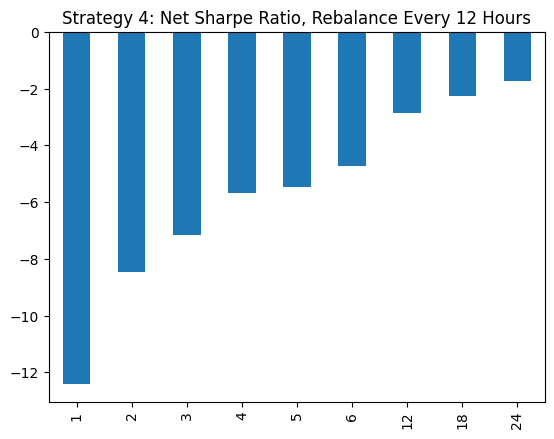

In [68]:
strat_4_12hr_results["net_sr"].plot(kind="bar",
                                    title="Strategy 4: Net Sharpe Ratio, Rebalance Every 12 Hours")

In [69]:
strat_4_1d_results = get_strat_4_results(ret[::6], volume_df[::6], 1)
strat_4_1d_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,0.047354,0.123101,-1.126990,0.123626,0.384677,-9.116138
2,-0.023999,0.126952,-0.853478,0.128032,-0.189041,-6.666109
3,0.024363,0.131508,-0.651066,0.133185,0.185259,-4.888448
4,0.002249,0.129345,-0.580328,0.130478,0.017388,-4.447717
5,0.014770,0.119992,-0.503503,0.121303,0.123090,-4.150805
6,-0.009860,0.117212,-0.478637,0.118497,-0.084122,-4.039229
12,-0.017198,0.119710,-0.315001,0.120365,-0.143661,-2.617047
18,0.013426,0.123938,-0.213687,0.124604,0.108332,-1.714932
24,0.003144,0.116205,-0.181818,0.116157,0.027057,-1.565277


In [70]:
strat_4_2d_results = get_strat_4_results(ret[::12], volume_df[::12], 0.5)
strat_4_2d_results

,gross_mean,gross_std,net_mean,net_std,gross_sr,net_sr
1,-0.018701,0.091078,-0.603343,0.091601,-0.205333,-6.586611
2,-0.001362,0.089229,-0.410820,0.091167,-0.015264,-4.506210
3,-0.002603,0.087426,-0.323937,0.088457,-0.029779,-3.662070
4,0.018885,0.088126,-0.261348,0.088779,0.214300,-2.943795
5,0.006361,0.090877,-0.246313,0.091406,0.069991,-2.694721
6,0.008223,0.093077,-0.215670,0.093865,0.088350,-2.297662
12,0.005625,0.086659,-0.130940,0.087091,0.064906,-1.503492
18,-0.031690,0.094138,-0.134795,0.094434,-0.336634,-1.427401
24,-0.017782,0.095016,-0.106667,0.095311,-0.187144,-1.119150


In [71]:
exponential_volume_change = (volume_df / volume_df.shift() - 1).ewm(alpha=0.1).mean()
exponential_volume_change

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.912909,-0.737362,0.207615,-0.200842,-0.951267,NaN,NaN,NaN
2020-01-01 08:00:00,0.034552,0.279374,-0.356284,1.051004,-0.201748,NaN,NaN,NaN
2020-01-01 12:00:00,0.977872,0.377529,-0.066166,0.413377,-0.465335,NaN,NaN,NaN
2020-01-01 16:00:00,0.614874,0.046652,-0.032906,0.378402,2.289373,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,1.290362,0.443999,0.715292,0.965492,0.564702,2.567459,3.7527,1.016191
2025-01-17 20:00:00,1.100794,0.426340,0.624447,0.858325,0.486561,3.144331,3.7527,0.844363
2025-01-18 00:00:00,0.965250,0.362368,0.532206,0.725440,0.403428,2.770813,3.7527,1.148467
2025-01-18 04:00:00,0.932033,0.395848,0.518491,0.759018,0.835641,2.539625,3.7527,1.137504


In [72]:
demeaned_exponential_volume_change = exponential_volume_change.rank(axis=1).subtract(
    exponential_volume_change.rank(axis=1).mean(axis=1), axis=0)
exponential_volume_holdings = demeaned_exponential_volume_change.divide(demeaned_exponential_volume_change.abs().sum(axis=1), axis=0)
exponential_volume_holdings

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.166667,0.000000,0.333333,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 08:00:00,0.000000,0.166667,-0.333333,0.333333,-0.166667,NaN,NaN,NaN
2020-01-01 12:00:00,0.333333,0.000000,-0.166667,0.166667,-0.333333,NaN,NaN,NaN
2020-01-01 16:00:00,0.166667,-0.166667,-0.333333,0.000000,0.333333,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,0.093750,-0.218750,-0.093750,-0.031250,-0.156250,0.15625,0.21875,0.03125
2025-01-17 20:00:00,0.093750,-0.218750,-0.093750,0.031250,-0.156250,0.15625,0.21875,-0.03125
2025-01-18 00:00:00,0.031250,-0.218750,-0.093750,-0.031250,-0.156250,0.15625,0.21875,0.09375
2025-01-18 04:00:00,0.031250,-0.218750,-0.156250,-0.093750,-0.031250,0.15625,0.21875,0.09375


In [73]:
exponential_volume_gross_returns = (exponential_volume_holdings.shift() * ret).sum(axis=1)
exponential_volume_gross_returns

2020-01-01 00:00:00    0.000000
2020-01-01 04:00:00    0.000000
2020-01-01 08:00:00    0.002469
2020-01-01 12:00:00   -0.001008
2020-01-01 16:00:00   -0.002248
                         ...   
2025-01-17 16:00:00   -0.001456
2025-01-17 20:00:00   -0.005844
2025-01-18 00:00:00    0.003965
2025-01-18 04:00:00    0.015321
2025-01-18 08:00:00    0.005396
Freq: 4h, Length: 11067, dtype: float64

In [74]:
exponential_volume_gross_returns.mean() * 365 * 6

0.18136886393442994

In [75]:
exponential_volume_gross_returns.mean() / exponential_volume_gross_returns.std() * np.sqrt(365 * 6)

0.6180149603078481

In [76]:
exponential_volume_net_returns = get_net_return(exponential_volume_holdings.shift(), ret)
exponential_volume_net_returns

2020-01-01 00:00:00    0.000000
2020-01-01 04:00:00    0.000000
2020-01-01 08:00:00    0.000469
2020-01-01 12:00:00   -0.003674
2020-01-01 16:00:00   -0.004248
                         ...   
2025-01-17 16:00:00   -0.001706
2025-01-17 20:00:00   -0.005844
2025-01-18 00:00:00    0.003715
2025-01-18 04:00:00    0.014821
2025-01-18 08:00:00    0.004896
Freq: 4h, Length: 11067, dtype: float64

In [77]:
exponential_volume_net_returns.mean() * 365 * 6

-1.1685215384630883

Try weighting earlier volume changes more.

In [78]:
volume_change_df = volume_df / volume_df.shift() - 1
volume_change_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,-0.912909,-0.737362,0.207615,-0.200842,-0.951267,NaN,NaN,NaN
2020-01-01 08:00:00,0.887267,1.194437,-0.863793,2.177665,0.472819,NaN,NaN,NaN
2020-01-01 12:00:00,2.590949,0.545372,0.429937,-0.676966,-0.916069,NaN,NaN,NaN
2020-01-01 16:00:00,-0.270478,-0.760356,0.048214,0.293099,9.008108,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,0.497687,-0.090819,0.453982,-0.353592,-0.140768,-0.911581,NaN,-0.527330
2025-01-17 20:00:00,-0.605323,0.267408,-0.193157,-0.106183,-0.216712,8.336185,NaN,-0.702090
2025-01-18 00:00:00,-0.254649,-0.213380,-0.297959,-0.470526,-0.344769,-0.590847,NaN,3.885399
2025-01-18 04:00:00,0.633087,0.697167,0.395051,1.061224,4.725559,0.458930,NaN,1.038835


In [79]:
reverse_exponential_weighting = (volume_change_df + 2 * volume_change_df.shift() + 4 * volume_change_df.shift(2) + 8 * volume_change_df.shift(3)) / 15
reverse_exponential_weighting

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,0.077148,-0.052717,-0.059078,0.402873,0.097140,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,0.111841,0.582818,-0.015367,0.584992,-0.138935,0.622091,NaN,0.420517
2025-01-17 20:00:00,1.100457,0.043724,0.630510,0.499722,0.263234,2.694995,NaN,1.706555
2025-01-18 00:00:00,1.245131,0.889494,1.892687,1.495465,0.312259,1.222008,NaN,2.035052
2025-01-18 04:00:00,0.112266,0.040899,0.177224,-0.208887,0.136202,1.688622,NaN,0.118842


In [80]:
ranked_rew = reverse_exponential_weighting.rank(axis=1).subtract(reverse_exponential_weighting.rank(axis=1).mean(axis=1), axis=0)
rrew = ranked_rew.divide(ranked_rew.abs().sum(axis=1), axis=0)
rrew

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 16:00:00,0.000000,-0.166667,-0.333333,0.333333,0.166667,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,-0.083333,0.083333,-0.166667,0.166667,-0.250000,0.250000,NaN,0.000000
2025-01-17 20:00:00,0.083333,-0.250000,0.000000,-0.083333,-0.166667,0.250000,NaN,0.166667
2025-01-18 00:00:00,0.000000,-0.166667,0.166667,0.083333,-0.250000,-0.083333,NaN,0.250000
2025-01-18 04:00:00,-0.083333,-0.166667,0.166667,-0.250000,0.083333,0.250000,NaN,0.000000


In [81]:
get_net_return(rrew.shift(), ret).mean() * 365 * 6

-4.2850192651262375

Try grouping data by day (less specific granularity).

In [82]:
daily_volume_df = volume_df.groupby(volume_df.index.date).sum()
daily_volume_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01,31.403883,419.85641,333132.3,1210.780,568474.4,0.00,0.0,0.000
2020-01-02,67.004407,298.29122,257302.4,2052.780,124152.7,0.00,0.0,0.000
2020-01-03,102.621386,513.53291,422872.0,7458.020,183712.9,0.00,0.0,0.000
2020-01-04,32.271372,87.49993,199212.9,1956.270,96464.2,0.00,0.0,0.000
2020-01-05,67.247638,275.28558,553095.4,2998.830,168050.5,0.00,0.0,0.000
...,...,...,...,...,...,...,...,...
2025-01-14,22.637980,238.75890,1122104.0,401.429,1251255.0,2929.23,0.0,2436.988
2025-01-15,26.396970,359.33740,2204751.0,381.284,2341465.0,6434.37,0.0,8318.585
2025-01-16,20.192650,323.18000,1701621.3,426.787,2761992.0,12807.68,0.0,9797.915
2025-01-17,27.344790,267.02960,838958.7,512.405,1035624.0,18605.36,0.0,9092.721


In [83]:
daily_volume_change_df = daily_volume_df / daily_volume_df.shift() - 1
daily_volume_change_df

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,1.133634,-0.289540,-0.227627,0.695419,-0.781604,NaN,NaN,NaN
2020-01-03,0.531562,0.721582,0.643483,2.633132,0.479733,NaN,NaN,NaN
2020-01-04,-0.685530,-0.829612,-0.528905,-0.737696,-0.474919,NaN,NaN,NaN
2020-01-05,1.083817,2.146123,1.776404,0.532933,0.742102,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-14,-0.115047,-0.324310,-0.192068,0.569885,-0.070483,-0.814269,NaN,-0.724019
2025-01-15,0.166048,0.505022,0.964837,-0.050183,0.871293,1.196608,NaN,2.413470
2025-01-16,-0.235039,-0.100622,-0.228203,0.119341,0.179600,0.990510,NaN,0.177834
2025-01-17,0.354195,-0.173743,-0.506965,0.200611,-0.625045,0.452672,NaN,-0.071974


In [84]:
start_time_px = px_df[px_df.index.hour == 0]
start_time_ret = start_time_px / start_time_px.shift() - 1
start_time_ret

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,-0.014270,-0.009372,0.005441,-0.019651,-0.009224,NaN,NaN,NaN
2020-01-03,-0.024461,-0.014888,-0.011425,-0.025619,-0.032090,NaN,NaN,NaN
2020-01-04,0.055064,0.049512,0.035280,0.035174,0.037507,NaN,NaN,NaN
2020-01-05,0.018916,0.018300,0.020858,0.027010,0.007976,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-14,0.008103,-0.024364,0.003166,0.008586,0.012495,-0.001703,NaN,-0.005399
2025-01-15,0.022041,0.020766,0.071737,0.011302,0.110791,0.030552,NaN,0.029365
2025-01-16,0.025493,0.041734,0.029836,0.012633,0.078941,0.063506,NaN,0.066705
2025-01-17,0.015997,-0.001230,0.061279,0.007536,0.088199,0.032687,NaN,0.046072


In [85]:
rolling_daily_mean = daily_volume_change_df.rolling(window=3, min_periods=1).mean()
demeaned_daily_rank = rolling_daily_mean.rank(axis=1).subtract(rolling_daily_mean.rank(axis=1).mean(axis=1), axis=0)
rolling_daily_holdings = demeaned_daily_rank.divide(demeaned_daily_rank.abs().sum(axis=1), axis=0)
# rolling_daily_holdings

daily_volume_net_returns = get_net_return(rolling_daily_holdings.shift(2), start_time_ret) * 365
daily_volume_net_returns

2020-01-01    0.000000
2020-01-02    0.000000
2020-01-03    0.000000
2020-01-04    0.533887
2020-01-05    1.711026
                ...   
2025-01-14    1.893203
2025-01-15   -0.578043
2025-01-16    2.760743
2025-01-17   -1.715196
2025-01-18   -0.060301
Length: 1845, dtype: float64

<Axes: >

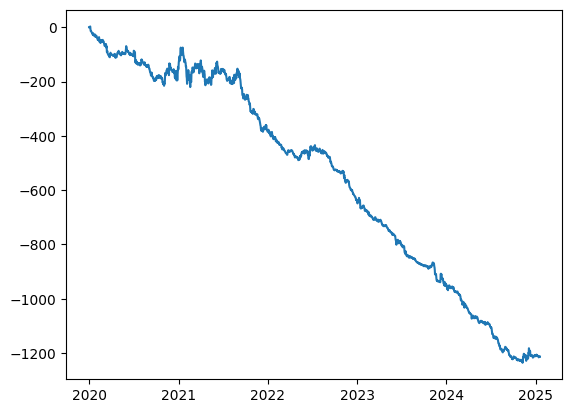

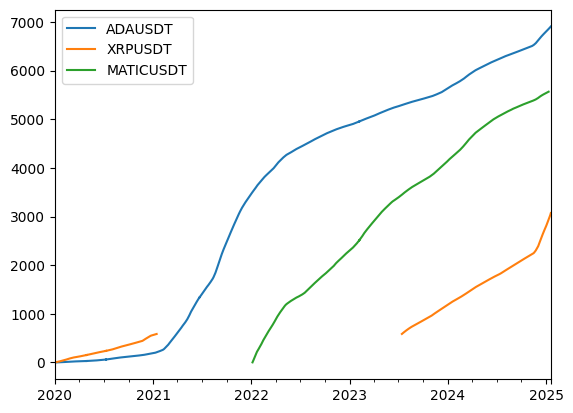

In [86]:
daily_volume_net_returns.cumsum().plot()
px_df.drop(columns=["BTCUSDT", "ETHUSDT","BNBUSDT","SOLUSDT","DOTUSDT"]).cumsum().plot()

Only trade coins with a change in volume above a certain threshold in absolute value.

## Strategy 5: Use Volume Traded Times Change In Price Over Interval As Signal

## Strategy 6: Pairs Trading For Cryptocurrencies (Reversal Strategy)

Observe the correlation between the different cryptocurrencies and try to apply pairs trading for highly correlated pairs.

In [87]:
px_df.corr()

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
BTCUSDT,1.000000,0.851435,0.494594,0.881929,0.735263,0.083251,-0.254158,0.840791
ETHUSDT,0.851435,1.000000,0.697252,0.918016,0.598878,0.510681,0.113725,0.864745
ADAUSDT,0.494594,0.697252,1.000000,0.537275,0.842436,0.886918,0.598519,0.398129
BNBUSDT,0.881929,0.918016,0.537275,1.000000,0.627286,0.221592,-0.139390,0.851775
XRPUSDT,0.735263,0.598878,0.842436,0.627286,1.000000,0.360919,-0.100425,0.536978
DOTUSDT,0.083251,0.510681,0.886918,0.221592,0.360919,1.000000,0.815793,0.325735
MATICUSDT,-0.254158,0.113725,0.598519,-0.139390,-0.100425,0.815793,1.000000,-0.128459
SOLUSDT,0.840791,0.864745,0.398129,0.851775,0.536978,0.325735,-0.128459,1.000000


There is a strong historical correlation between ETHUSDT and BNBUSDT of ~0.919. There are also fairly strong correlations between BTCUSDT and BNBUSDT

<Axes: >

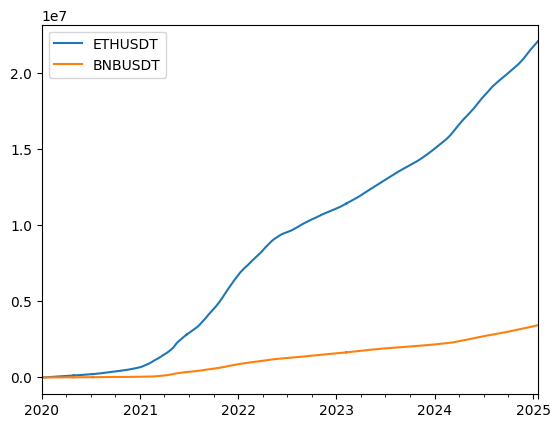

In [88]:
px_df[["ETHUSDT", "BNBUSDT"]].cumsum().plot()

In [89]:
import statsmodels.api as sm

X = px_df["BNBUSDT"]
X = sm.add_constant(X)
X

,const,BNBUSDT
2020-01-01 00:00:00,1.0,13.8159
2020-01-01 04:00:00,1.0,13.7648
2020-01-01 08:00:00,1.0,13.7162
2020-01-01 12:00:00,1.0,13.7958
2020-01-01 16:00:00,1.0,13.7270
...,...,...
2025-01-17 16:00:00,1.0,719.5400
2025-01-17 20:00:00,1.0,721.2500
2025-01-18 00:00:00,1.0,705.3500
2025-01-18 04:00:00,1.0,699.4000


In [90]:
Y = px_df["ETHUSDT"]
Y

2020-01-01 00:00:00     130.18
2020-01-01 04:00:00     130.52
2020-01-01 08:00:00     130.84
2020-01-01 12:00:00     131.84
2020-01-01 16:00:00     131.98
                        ...   
2025-01-17 16:00:00    3434.67
2025-01-17 20:00:00    3474.23
2025-01-18 00:00:00    3385.43
2025-01-18 04:00:00    3293.29
2025-01-18 08:00:00    3250.01
Freq: 4h, Name: ETHUSDT, Length: 11067, dtype: float64

In [91]:
drop_X = X[X["BNBUSDT"].isna()].index
drop_X

DatetimeIndex(['2020-04-28 04:00:00', '2020-04-28 08:00:00',
               '2020-07-09 04:00:00', '2020-07-09 08:00:00',
               '2021-06-22 04:00:00', '2023-02-06 08:00:00'],
              dtype='datetime64[ns]', freq=None)

In [92]:
X = X.drop(drop_X)
X

,const,BNBUSDT
2020-01-01 00:00:00,1.0,13.8159
2020-01-01 04:00:00,1.0,13.7648
2020-01-01 08:00:00,1.0,13.7162
2020-01-01 12:00:00,1.0,13.7958
2020-01-01 16:00:00,1.0,13.7270
...,...,...
2025-01-17 16:00:00,1.0,719.5400
2025-01-17 20:00:00,1.0,721.2500
2025-01-18 00:00:00,1.0,705.3500
2025-01-18 04:00:00,1.0,699.4000


In [93]:
X[X["BNBUSDT"].isna()]

,const,BNBUSDT


In [94]:
drop_Y = Y[Y.isna()].index
drop_Y

DatetimeIndex(['2020-04-28 04:00:00', '2020-04-28 08:00:00',
               '2020-07-09 04:00:00', '2020-07-09 08:00:00',
               '2021-06-22 04:00:00', '2023-02-06 08:00:00'],
              dtype='datetime64[ns]', freq=None)

In [95]:
Y = Y.drop(drop_Y)
Y

2020-01-01 00:00:00     130.18
2020-01-01 04:00:00     130.52
2020-01-01 08:00:00     130.84
2020-01-01 12:00:00     131.84
2020-01-01 16:00:00     131.98
                        ...   
2025-01-17 16:00:00    3434.67
2025-01-17 20:00:00    3474.23
2025-01-18 00:00:00    3385.43
2025-01-18 04:00:00    3293.29
2025-01-18 08:00:00    3250.01
Name: ETHUSDT, Length: 11061, dtype: float64

In [96]:
Y[Y.isna()]

Series([], Name: ETHUSDT, dtype: float64)

In [97]:
model_ols = sm.OLS(Y, X)
model_ols

In [98]:
results_ols = model_ols.fit()
results_ols.params

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


const      346.648024
BNBUSDT      5.311020
dtype: float64

In [99]:
X["OLS Reg Model"] = X["BNBUSDT"] * results_ols.params["BNBUSDT"] + results_ols.params["const"]
X

,const,BNBUSDT,OLS Reg Model
2020-01-01 00:00:00,1.0,13.8159,420.024538
2020-01-01 04:00:00,1.0,13.7648,419.753145
2020-01-01 08:00:00,1.0,13.7162,419.495030
2020-01-01 12:00:00,1.0,13.7958,419.917787
2020-01-01 16:00:00,1.0,13.7270,419.552389
...,...,...,...
2025-01-17 16:00:00,1.0,719.5400,4168.138998
2025-01-17 20:00:00,1.0,721.2500,4177.220842
2025-01-18 00:00:00,1.0,705.3500,4092.775632
2025-01-18 04:00:00,1.0,699.4000,4061.175065


In [100]:
X["residuals"] = Y - X["OLS Reg Model"]
X["ETHUSDT"] = Y
X

,const,BNBUSDT,OLS Reg Model,residuals,ETHUSDT
2020-01-01 00:00:00,1.0,13.8159,420.024538,-289.844538,130.18
2020-01-01 04:00:00,1.0,13.7648,419.753145,-289.233145,130.52
2020-01-01 08:00:00,1.0,13.7162,419.495030,-288.655030,130.84
2020-01-01 12:00:00,1.0,13.7958,419.917787,-288.077787,131.84
2020-01-01 16:00:00,1.0,13.7270,419.552389,-287.572389,131.98
...,...,...,...,...,...
2025-01-17 16:00:00,1.0,719.5400,4168.138998,-733.468998,3434.67
2025-01-17 20:00:00,1.0,721.2500,4177.220842,-702.990842,3474.23
2025-01-18 00:00:00,1.0,705.3500,4092.775632,-707.345632,3385.43
2025-01-18 04:00:00,1.0,699.4000,4061.175065,-767.885065,3293.29


<Axes: >

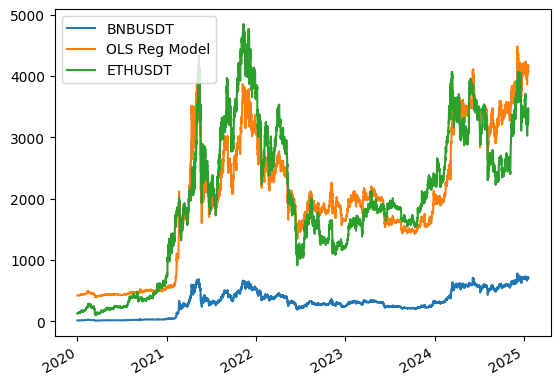

In [101]:
X[["BNBUSDT", "OLS Reg Model", "ETHUSDT"]].plot()

In [102]:
X[["OLS Reg Model"]].corrwith(X["ETHUSDT"])

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


OLS Reg Model    0.918016
dtype: float64

<Axes: >

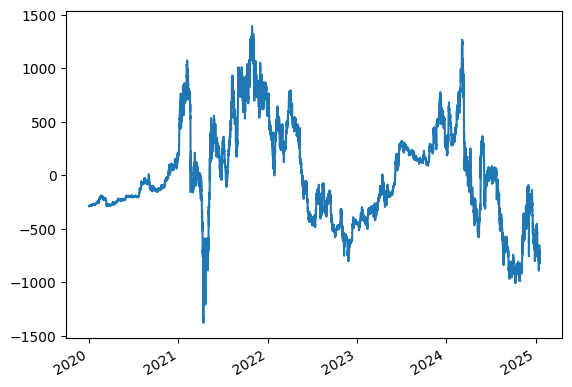

In [103]:
X["residuals"].plot()

In [104]:
early_X = X.iloc[:(X.shape[0] // 2)]
early_X

,const,BNBUSDT,OLS Reg Model,residuals,ETHUSDT
2020-01-01 00:00:00,1.0,13.8159,420.024538,-289.844538,130.18
2020-01-01 04:00:00,1.0,13.7648,419.753145,-289.233145,130.52
2020-01-01 08:00:00,1.0,13.7162,419.495030,-288.655030,130.84
2020-01-01 12:00:00,1.0,13.7958,419.917787,-288.077787,131.84
2020-01-01 16:00:00,1.0,13.7270,419.552389,-287.572389,131.98
...,...,...,...,...,...
2022-07-10 16:00:00,1.0,234.4682,1591.913207,-418.053207,1173.86
2022-07-10 20:00:00,1.0,234.8369,1593.871380,-427.241380,1166.63
2022-07-11 00:00:00,1.0,231.7354,1577.399253,-421.779253,1155.62
2022-07-11 04:00:00,1.0,229.5212,1565.639594,-422.489594,1143.15


In [105]:
early_Y = Y.iloc[:(Y.shape[0] // 2)]
early_Y

2020-01-01 00:00:00     130.18
2020-01-01 04:00:00     130.52
2020-01-01 08:00:00     130.84
2020-01-01 12:00:00     131.84
2020-01-01 16:00:00     131.98
                        ...   
2022-07-10 16:00:00    1173.86
2022-07-10 20:00:00    1166.63
2022-07-11 00:00:00    1155.62
2022-07-11 04:00:00    1143.15
2022-07-11 08:00:00    1143.16
Name: ETHUSDT, Length: 5530, dtype: float64

In [106]:
early_model_ols = sm.OLS(early_Y, early_X[["const", "BNBUSDT"]])
early_results_ols = early_model_ols.fit()
early_results_ols.params

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


const      233.091301
BNBUSDT      6.444500
dtype: float64

### Try Using Z-Scores To Determine When To Take Positions

In [107]:
eth_bnb_df = px_df.loc[:pd.to_datetime("2022-12-31 20:00:00")][["ETHUSDT", "BNBUSDT"]]
eth_bnb_df

,ETHUSDT,BNBUSDT
2020-01-01 00:00:00,130.18,13.8159
2020-01-01 04:00:00,130.52,13.7648
2020-01-01 08:00:00,130.84,13.7162
2020-01-01 12:00:00,131.84,13.7958
2020-01-01 16:00:00,131.98,13.7270
...,...,...
2022-12-31 04:00:00,1197.04,245.5269
2022-12-31 08:00:00,1197.13,245.7466
2022-12-31 12:00:00,1202.01,247.0076
2022-12-31 16:00:00,1202.37,246.7732


In [108]:
eth_bnb_df['ETH rets'] = eth_bnb_df['ETHUSDT'] / eth_bnb_df['ETHUSDT'].shift() - 1
eth_bnb_df['ETH log rets'] = np.log(eth_bnb_df['ETHUSDT']) - np.log(eth_bnb_df['ETHUSDT']).shift()
eth_bnb_df['BNB rets'] = eth_bnb_df['BNBUSDT'] / eth_bnb_df['BNBUSDT'].shift() - 1
eth_bnb_df['BNB log rets'] = np.log(eth_bnb_df['BNBUSDT']) / np.log(eth_bnb_df['BNBUSDT'].shift())

eth_bnb_df['ETH 30-day avg price'] = eth_bnb_df['ETHUSDT'].rolling(window=30*6, min_periods=1).mean()
eth_bnb_df['ETH 30-day avg rets'] = eth_bnb_df['ETH rets'].rolling(window=30*6, min_periods=1).mean()
eth_bnb_df['ETH 30-day avg log rets'] = eth_bnb_df['ETH log rets'].rolling(window=30*6, min_periods=1).mean()

eth_bnb_df['BNB 30-day avg price'] = eth_bnb_df['BNBUSDT'].rolling(window=30*6, min_periods=1).mean()
eth_bnb_df['BNB 30-day avg rets'] = eth_bnb_df['BNB rets'].rolling(window=30*6, min_periods=1).mean()
eth_bnb_df['BNB 30-day avg log rets'] = eth_bnb_df['BNB log rets'].rolling(window=30*6, min_periods=1).mean()

eth_bnb_df.head()

,ETHUSDT,BNBUSDT,ETH rets,ETH log rets,BNB rets,BNB log rets,ETH 30-day avg price,ETH 30-day avg rets,ETH 30-day avg log rets,BNB 30-day avg price,BNB 30-day avg rets,BNB 30-day avg log rets
2020-01-01 00:00:00,130.18,13.8159,NaN,NaN,NaN,NaN,130.180000,NaN,NaN,13.815900,NaN,NaN
2020-01-01 04:00:00,130.52,13.7648,0.002612,0.002608,-0.003699,0.998589,130.350000,0.002612,0.002608,13.790350,-0.003699,0.998589
2020-01-01 08:00:00,130.84,13.7162,0.002452,0.002449,-0.003531,0.998651,130.513333,0.002532,0.002529,13.765633,-0.003615,0.998620
2020-01-01 12:00:00,131.84,13.7958,0.007643,0.007614,0.005803,1.002210,130.845000,0.004235,0.004224,13.773175,-0.000475,0.999817
2020-01-01 16:00:00,131.98,13.7270,0.001062,0.001061,-0.004987,0.998095,131.072000,0.003442,0.003433,13.763940,-0.001603,0.999386


In [109]:
### CHANGE THIS ORDER

columns = [('ETHUSDT', 'price'), ('BNBUSDT', 'price'), ('ETHUSDT', 'rets'), ('ETHUSDT', 'log rets'),
           ('BNBUSDT', 'rets'), ('BNBUSDT', 'log rets'), ('ETHUSDT', '30-day avg price'),
           ('ETHUSDT', '30-day avg rets'), ('ETHUSDT', '30-day avg log rets'), ('BNBUSDT', '30-day avg price'),
           ('BNBUSDT', '30-day avg rets'), ('BNBUSDT', '30-day avg log rets')
           
           #('ETHUSDT', 'log rets'), ('BNBUSDT', 'rets'), ('BNBUSDT', 'log rets'),
           #('ETHUSDT', '30-day avg log rets'), ('ETHUSDT', '30-day avg price'),
           #('BNBUSDT', '30-day avg price')
          ]
eth_bnb_df.columns = pd.MultiIndex.from_tuples(columns)
eth_bnb_df = eth_bnb_df.sort_index(level=0, axis=1)
eth_bnb_df

BNBUSDT                                   \
                    30-day avg log rets 30-day avg price 30-day avg rets   
2020-01-01 00:00:00                 NaN        13.815900             NaN   
2020-01-01 04:00:00            0.998589        13.790350       -0.003699   
2020-01-01 08:00:00            0.998620        13.765633       -0.003615   
2020-01-01 12:00:00            0.999817        13.773175       -0.000475   
2020-01-01 16:00:00            0.999386        13.763940       -0.001603   
...                                 ...              ...             ...   
2022-12-31 04:00:00            0.999810       264.290229       -0.001022   
2022-12-31 08:00:00            0.999802       263.985955       -0.001064   
2022-12-31 12:00:00            0.999836       263.737336       -0.000874   
2022-12-31 16:00:00            0.999836       263.488683       -0.000875   
2022-12-31 20:00:00            0.999831       263.231834       -0.000905   

                                                              ETHUSDT  \
                     log rets     price      rets 30-day avg log rets   
2020-01-01 00:00:00       NaN   13.8159       NaN                 NaN   
2020-01-01 04:00:00  0.998589   13.7648 -0.003699            0.002608   
2020-01-01 08:00:00  0.998651   13.7162 -0.003531            0.002529   
2020-01-01 12:00:00  1.002210   13.7958  0.005803            0.004224   
2020-01-01 16:00:00  0.998095   13.7270 -0.004987            0.003433   
...                       ...       ...       ...                 ...   
2022-12-31 04:00:00  1.000168  245.5269  0.000925           -0.000368   
2022-12-31 08:00:00  1.000163  245.7466  0.000895           -0.000382   
2022-12-31 12:00:00  1.000930  247.0076  0.005131           -0.000310   
2022-12-31 16:00:00  0.999828  246.7732 -0.000949           -0.000328   
2022-12-31 20:00:00  0.999478  246.0640 -0.002874           -0.000362   

                                                                         \
                    30-day avg price 30-day avg rets  log rets    price   
2020-01-01 00:00:00       130.180000             NaN       NaN   130.18   
2020-01-01 04:00:00       130.350000        0.002612  0.002608   130.52   
2020-01-01 08:00:00       130.513333        0.002532  0.002449   130.84   
2020-01-01 12:00:00       130.845000        0.004235  0.007614   131.84   
2020-01-01 16:00:00       131.072000        0.003442  0.001061   131.98   
...                              ...             ...       ...      ...   
2022-12-31 04:00:00      1237.776278       -0.000330  0.001881  1197.04   
2022-12-31 08:00:00      1237.302389       -0.000344  0.000075  1197.13   
2022-12-31 12:00:00      1236.919778       -0.000271  0.004068  1202.01   
2022-12-31 16:00:00      1236.513500       -0.000290  0.000299  1202.37   
2022-12-31 20:00:00      1236.066556       -0.000324 -0.005270  1196.05   

                               
                         rets  
2020-01-01 00:00:00       NaN  
2020-01-01 04:00:00  0.002612  
2020-01-01 08:00:00  0.002452  
2020-01-01 12:00:00  0.007643  
2020-01-01 16:00:00  0.001062  
...                       ...  
2022-12-31 04:00:00  0.001883  
2022-12-31 08:00:00  0.000075  
2022-12-31 12:00:00  0.004076  
2022-12-31 16:00:00  0.000299  
2022-12-31 20:00:00 -0.005256  

[6576 rows x 12 columns]

In [110]:
# Price regression

eth_bnb_price_df = eth_bnb_df[[("BNBUSDT", "30-day avg price"), ("ETHUSDT", "30-day avg price")]]
eth_bnb_price_df = sm.add_constant(eth_bnb_price_df)

eth_bnb_price_df

,const,"(BNBUSDT, 30-day avg price)","(ETHUSDT, 30-day avg price)"
2020-01-01 00:00:00,1.0,13.815900,130.180000
2020-01-01 04:00:00,1.0,13.790350,130.350000
2020-01-01 08:00:00,1.0,13.765633,130.513333
2020-01-01 12:00:00,1.0,13.773175,130.845000
2020-01-01 16:00:00,1.0,13.763940,131.072000
...,...,...,...
2022-12-31 04:00:00,1.0,264.290229,1237.776278
2022-12-31 08:00:00,1.0,263.985955,1237.302389
2022-12-31 12:00:00,1.0,263.737336,1236.919778
2022-12-31 16:00:00,1.0,263.488683,1236.513500


In [111]:
eth_bnb_price_model_ols = sm.OLS(eth_bnb_price_df[("ETHUSDT", "30-day avg price")],
                                 eth_bnb_price_df[["const", ("BNBUSDT", "30-day avg price")]])

eth_bnb_price_results_ols = eth_bnb_price_model_ols.fit()
eth_bnb_price_results_ols.params

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


const                          149.722077
(BNBUSDT, 30-day avg price)      6.404385
dtype: float64

In [112]:
eth_bnb_price_df["ETHUSDT, model prediction"] = \
    eth_bnb_price_results_ols.params["const"] + \
    eth_bnb_price_results_ols.params[("BNBUSDT", "30-day avg price")] * eth_bnb_price_df[("BNBUSDT", "30-day avg price")]
# eth_bnb_price_results_ols.params["const"]
# eth_bnb_price_results_ols.params[("BNBUSDT", "30-day avg price")]

eth_bnb_price_df["model residuals"] = \
    eth_bnb_price_df[("ETHUSDT", "30-day avg price")] - eth_bnb_price_df["ETHUSDT, model prediction"]

In [113]:
eth_bnb_price_df

,const,"(BNBUSDT, 30-day avg price)","(ETHUSDT, 30-day avg price)","ETHUSDT, model prediction",model residuals
2020-01-01 00:00:00,1.0,13.815900,130.180000,238.204414,-108.024414
2020-01-01 04:00:00,1.0,13.790350,130.350000,238.040782,-107.690782
2020-01-01 08:00:00,1.0,13.765633,130.513333,237.882487,-107.369153
2020-01-01 12:00:00,1.0,13.773175,130.845000,237.930786,-107.085786
2020-01-01 16:00:00,1.0,13.763940,131.072000,237.871642,-106.799642
...,...,...,...,...,...
2022-12-31 04:00:00,1.0,264.290229,1237.776278,1842.338348,-604.562070
2022-12-31 08:00:00,1.0,263.985955,1237.302389,1840.389657,-603.087268
2022-12-31 12:00:00,1.0,263.737336,1236.919778,1838.797403,-601.877625
2022-12-31 16:00:00,1.0,263.488683,1236.513500,1837.204938,-600.691438


### Single Pair, Rolling Beta, Price

Other things to try:
- many pairs of two coins
- multiple regression of one coin predicted by many other correlated coins
- beta over a fixed period (not rolling)
- use of returns or log returns instead of price
- once a z-score matching a threshold is found, don't rebalance until the z-score moves below the threshold again

In [114]:
eth_bnb_rb_price_signal_df = px_df[["ETHUSDT", "BNBUSDT"]][:]
eth_bnb_rb_price_signal_df.rename({"ETHUSDT": "Y", "BNBUSDT": "X"}, axis = 1, inplace=True)

def strat_6_get_z_scores_from_rolling_beta(signal_df):
    signal_df["rolling cov"] = signal_df["X"].rolling(window=30*6, min_periods=1).cov(signal_df["Y"])
    signal_df["X rolling var"] = signal_df["X"].rolling(window=30*6, min_periods=1).var()
    signal_df["beta"] = signal_df["rolling cov"] / signal_df["X rolling var"]
    signal_df["alpha"] = signal_df["Y"].rolling(window=30*6, min_periods=1).mean() - \
        signal_df["beta"] * signal_df["X"].rolling(window=30*6, min_periods=1).mean()

    # signal_df["ETH 30-day avg, est"] = \
    #     signal_df["BNB, 30-day avg"] * eth_bnb_price_results_ols.params[("BNBUSDT", "30-day avg price")] + \
    #     eth_bnb_price_results_ols.params["const"]
    # signal_df["ETH residual"] = signal_df["ETH, 30-day avg"] - signal_df["ETH 30-day avg, est"]
    # signal_df["ETH residual, mu"] = signal_df["ETH residual"].rolling(window=30*6, min_periods=1).mean()
    # signal_df["ETH residual, sigma"] = signal_df["ETH residual"].rolling(window=30*6, min_periods=1).std()
    # signal_df["z-score"] = (signal_df["ETH residual"] - signal_df["ETH residual, mu"]) / \
    #     signal_df["ETH residual, sigma"]

    signal_df["residual"] = signal_df["Y"] - (signal_df["X"] * signal_df["beta"] + signal_df["alpha"])

    residual_mean = signal_df["residual"].rolling(window=30*6, min_periods=1).mean()
    residual_std = signal_df["residual"].rolling(window=30*6, min_periods=1).std()
    signal_df["z-score"] = (signal_df["residual"] - residual_mean) / residual_std

    return signal_df

eth_bnb_rb_price_signal_df = strat_6_get_z_scores_from_rolling_beta(eth_bnb_rb_price_signal_df)
eth_bnb_rb_price_signal_df

,Y,X,rolling cov,X rolling var,beta,alpha,residual,z-score
2020-01-01 00:00:00,130.18,13.8159,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,130.52,13.7648,-0.008687,0.001306,-6.653620,222.105753,-1.799094e-11,NaN
2020-01-01 08:00:00,130.84,13.7162,-0.016455,0.002486,-6.620149,221.643874,-5.893547e-04,-0.707107
2020-01-01 12:00:00,131.84,13.7958,-0.000965,0.001885,-0.511797,137.894071,1.006579e+00,1.154700
2020-01-01 16:00:00,131.98,13.7270,-0.011205,0.001840,-6.090298,214.898490,6.830244e-01,0.515887
...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,3434.67,719.5400,1205.669658,289.880382,4.159197,499.177007,-5.721572e+01,1.671374
2025-01-17 20:00:00,3474.23,721.2500,1229.642900,292.832854,4.199129,469.700823,-2.409254e+01,2.016273
2025-01-18 00:00:00,3385.43,705.3500,1237.296193,293.122501,4.221089,452.518752,-4.443395e+01,1.794957
2025-01-18 04:00:00,3293.29,699.4000,1229.100134,293.081818,4.193710,469.427260,-1.092180e+02,1.104298


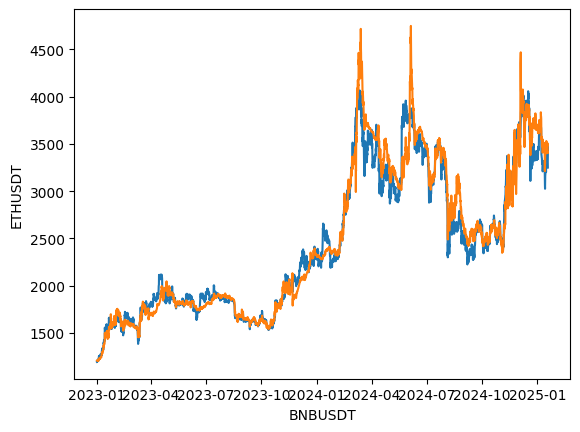

In [115]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(eth_bnb_rb_price_signal_df["Y"].loc[pd.to_datetime("2023-01-01 00:00:00"):])
ax.plot((eth_bnb_rb_price_signal_df["X"] * eth_bnb_rb_price_signal_df["beta"] + eth_bnb_rb_price_signal_df["alpha"]).loc[pd.to_datetime("2023-01-01 00:00:00"):])
plt.xlabel("BNBUSDT")
plt.ylabel("ETHUSDT")
plt.show()

In [116]:
def strat_6_get_holdings_based_on_z_score(signal_df, threshold):
    pairs_trading_holdings = pd.DataFrame(index=signal_df.index)
    pairs_trading_holdings["Y"] = 0.0
    pairs_trading_holdings["X"] = 0.0

    pairs_trading_holdings.loc[signal_df["z-score"] > threshold, "Y"] = -1.0
    pairs_trading_holdings.loc[signal_df["z-score"] < -threshold, "Y"] = 1.0

    pairs_trading_holdings.loc[signal_df["z-score"] > threshold, "X"] = signal_df.loc[signal_df["z-score"] > threshold, "beta"]
    pairs_trading_holdings.loc[signal_df["z-score"] < -threshold, "X"] = -signal_df.loc[signal_df["z-score"] < -threshold, "beta"]

    pairs_trading_holdings = pairs_trading_holdings.divide(pairs_trading_holdings.abs().sum(axis=1), axis=0)
    pairs_trading_holdings = pairs_trading_holdings.fillna(0)
    
    return pairs_trading_holdings

strat_6_eth_bnb_rb_price_holdings = strat_6_get_holdings_based_on_z_score(eth_bnb_rb_price_signal_df, 1.0)
strat_6_eth_bnb_rb_price_holdings

,Y,X
2020-01-01 00:00:00,0.000000,0.000000
2020-01-01 04:00:00,0.000000,0.000000
2020-01-01 08:00:00,0.000000,0.000000
2020-01-01 12:00:00,-0.661464,-0.338536
2020-01-01 16:00:00,0.000000,0.000000
...,...,...
2025-01-17 16:00:00,-0.193829,0.806171
2025-01-17 20:00:00,-0.192340,0.807660
2025-01-18 00:00:00,-0.191531,0.808469
2025-01-18 04:00:00,-0.192541,0.807459


In [117]:
def strat_6_get_net_returns(holdings_df, pair_returns):
    return get_net_return(holdings_df.shift(), pair_returns)

/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1116/1176311062.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eth_bnb_ret = px_df[["ETHUSDT", "BNBUSDT"]][:].pct_change()


<Axes: >

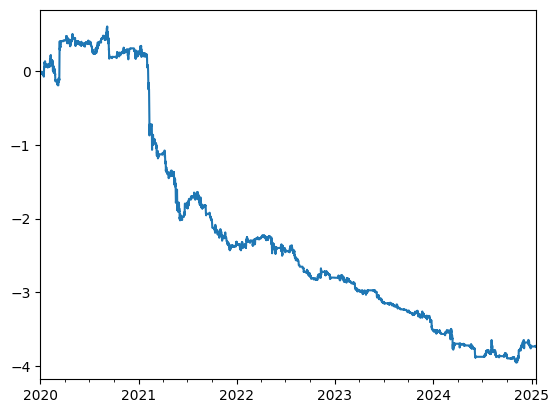

In [118]:
eth_bnb_ret = px_df[["ETHUSDT", "BNBUSDT"]][:].pct_change()
eth_bnb_ret.rename({"ETHUSDT": "Y", "BNBUSDT": "X"}, axis=1, inplace=True)

# strat_6_eth_bnb_rb_price_returns = get_net_return(strat_6_eth_bnb_rb_price_holdings.shift(), eth_bnb_ret)
strat_6_eth_bnb_rb_price_returns = strat_6_get_net_returns(strat_6_eth_bnb_rb_price_holdings, eth_bnb_ret)
strat_6_eth_bnb_rb_price_returns.cumsum().plot()

In [119]:
strat_6_eth_bnb_rb_price_sr = strat_6_eth_bnb_rb_price_returns.mean() / strat_6_eth_bnb_rb_price_returns.std() * np.sqrt(365 * 6)
strat_6_eth_bnb_rb_price_sr

-1.5240249755890805

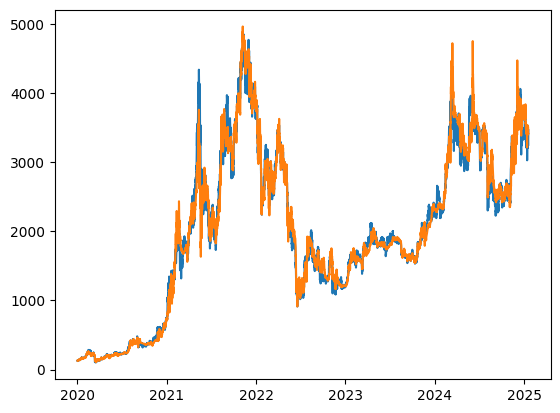

In [120]:
fig, ax = plt.subplots()
ax.plot(eth_bnb_rb_price_signal_df["Y"])
ax.plot(eth_bnb_rb_price_signal_df["X"] * eth_bnb_rb_price_signal_df["beta"] + eth_bnb_rb_price_signal_df["alpha"])

plt.show()

In [121]:
# eth_bnb_rb_return_signal_df = px_df[["ETHUSDT", "BNBUSDT"]][:] / px_df[["ETHUSDT", "BNBUSDT"]].shift() - 1
# eth_bnb_rb_return_signal_df

px_df.pct_change().corr()

/var/folders/46/nmm5hcbx71d6nqy2066wsyjc0000gn/T/ipykernel_1116/3992632177.py:4: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  px_df.pct_change().corr()


,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
BTCUSDT,1.000000,0.836176,0.675266,0.700026,0.231471,0.709530,0.699047,0.608047
ETHUSDT,0.836176,1.000000,0.719083,0.726291,0.257324,0.746984,0.755573,0.655208
ADAUSDT,0.675266,0.719083,1.000000,0.644660,0.275558,0.772056,0.730353,0.596491
BNBUSDT,0.700026,0.726291,0.644660,1.000000,0.215649,0.696247,0.685660,0.570409
XRPUSDT,0.231471,0.257324,0.275558,0.215649,1.000000,0.212369,0.178192,0.147595
DOTUSDT,0.709530,0.746984,0.772056,0.696247,0.212369,1.000000,0.743780,0.696243
MATICUSDT,0.699047,0.755573,0.730353,0.685660,0.178192,0.743780,1.000000,0.701206
SOLUSDT,0.608047,0.655208,0.596491,0.570409,0.147595,0.696243,0.701206,1.000000


<Axes: >

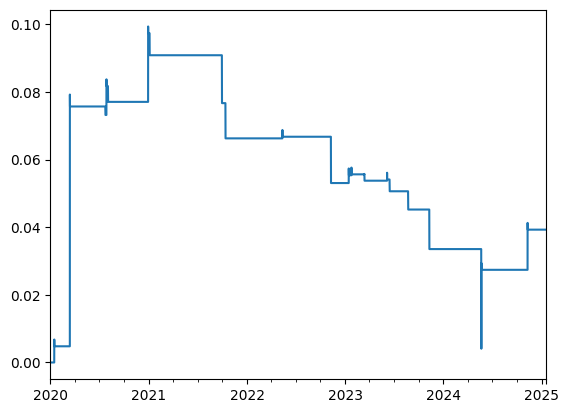

In [122]:
eth_bnb_rb_return_signal_df = px_df[["ETHUSDT", "BNBUSDT"]][:] / px_df[["ETHUSDT", "BNBUSDT"]].shift() - 1
eth_bnb_rb_return_signal_df.rename({"ETHUSDT": "Y", "BNBUSDT": "X"}, axis=1, inplace=True)
eth_bnb_rb_return_signal_df = strat_6_get_z_scores_from_rolling_beta(eth_bnb_rb_return_signal_df)

threshold = 5.0
eth_bnb_rb_return_holdings = strat_6_get_holdings_based_on_z_score(eth_bnb_rb_return_signal_df, threshold)

eth_bnb_rb_return_results = strat_6_get_net_returns(eth_bnb_rb_return_holdings, eth_bnb_rb_return_signal_df[["Y", "X"]])

# eth_bnb_rb_return_holdings
# eth_bnb_rb_return_signal_df[["Y", "X"]]
eth_bnb_rb_return_results.cumsum().plot()

In [123]:
eth_bnb_rb_return_results.mean() / eth_bnb_rb_return_results.std() * np.sqrt(365 * 6)

0.19067591900070874

<Axes: >

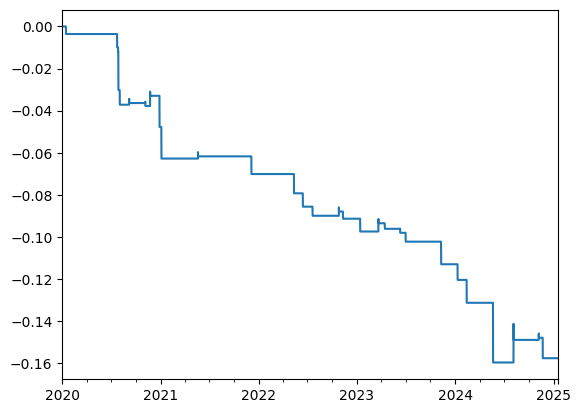

In [124]:
# ETH to BTC - higher correlation of returns of around 0.84

eth_btc_rb_return_signal_df = px_df[["ETHUSDT", "BTCUSDT"]][:] / px_df[["ETHUSDT", "BTCUSDT"]].shift() - 1
eth_btc_rb_return_signal_df.rename({"ETHUSDT": "Y", "BTCUSDT": "X"}, axis=1, inplace=True)
eth_btc_rb_return_signal_df = strat_6_get_z_scores_from_rolling_beta(eth_btc_rb_return_signal_df)


threshold = 5.0
eth_btc_rb_return_holdings = strat_6_get_holdings_based_on_z_score(eth_btc_rb_return_signal_df, threshold)
eth_btc_rb_return_results = strat_6_get_net_returns(eth_btc_rb_return_holdings, eth_btc_rb_return_signal_df[["Y", "X"]])

eth_btc_rb_return_results.cumsum().plot()

In [125]:
eth_btc_rb_return_results.mean() / eth_btc_rb_return_results.std() * np.sqrt(365 * 6)

-1.5452888021143805

In [126]:
(np.log(px_df) - np.log(px_df.shift())).corr()

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
BTCUSDT,1.000000,0.839949,0.682722,0.708841,0.542404,0.713450,0.704427,0.613974
ETHUSDT,0.839949,1.000000,0.725832,0.735381,0.604611,0.750572,0.762287,0.661360
ADAUSDT,0.682722,0.725832,1.000000,0.654647,0.623040,0.777310,0.742074,0.603460
BNBUSDT,0.708841,0.735381,0.654647,1.000000,0.531433,0.701351,0.691576,0.578273
XRPUSDT,0.542404,0.604611,0.623040,0.531433,1.000000,0.613934,0.585647,0.422376
DOTUSDT,0.713450,0.750572,0.777310,0.701351,0.613934,1.000000,0.753499,0.700036
MATICUSDT,0.704427,0.762287,0.742074,0.691576,0.585647,0.753499,1.000000,0.708049
SOLUSDT,0.613974,0.661360,0.603460,0.578273,0.422376,0.700036,0.708049,1.000000


<Axes: >

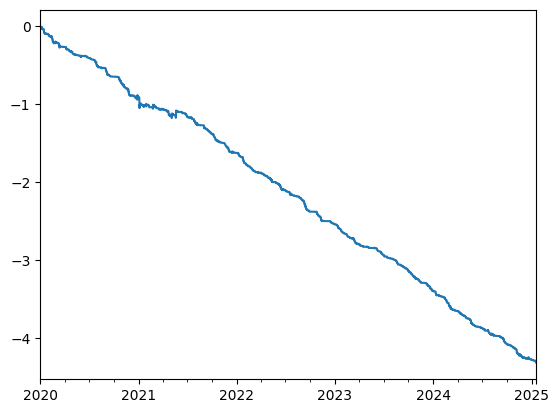

In [127]:
# log ETH minus log BTC

eth_btc_rb_log_signal_df = np.log(px_df[["ETHUSDT", "BTCUSDT"]][:]) - np.log(px_df[["ETHUSDT", "BTCUSDT"]].shift())

eth_btc_rb_log_signal_df.rename({"ETHUSDT": "Y", "BTCUSDT": "X"}, axis=1, inplace=True)
eth_btc_rb_log_signal_df = strat_6_get_z_scores_from_rolling_beta(eth_btc_rb_log_signal_df)

threshold = 1.5
eth_btc_rb_log_holdings = strat_6_get_holdings_based_on_z_score(eth_btc_rb_log_signal_df, threshold)

eth_btc_returns_df = px_df[["ETHUSDT", "BTCUSDT"]] / px_df[["ETHUSDT", "BTCUSDT"]].shift() - 1
eth_btc_returns_df.rename({"ETHUSDT": "Y", "BTCUSDT": "X"}, axis=1, inplace=True)

eth_btc_rb_log_results = strat_6_get_net_returns(eth_btc_rb_log_holdings, eth_btc_returns_df)
eth_btc_rb_log_results.cumsum().plot()

In [128]:
eth_btc_rb_log_results.mean() / eth_btc_rb_log_results.std() * np.sqrt(365 * 6)

-7.669542398533536

### Hold Without Rebalancing Until Threshold Is Met

In [129]:
strat_6_get_z_scores_from_rolling_beta
px_df.corr()

,BTCUSDT,ETHUSDT,ADAUSDT,BNBUSDT,XRPUSDT,DOTUSDT,MATICUSDT,SOLUSDT
BTCUSDT,1.000000,0.851435,0.494594,0.881929,0.735263,0.083251,-0.254158,0.840791
ETHUSDT,0.851435,1.000000,0.697252,0.918016,0.598878,0.510681,0.113725,0.864745
ADAUSDT,0.494594,0.697252,1.000000,0.537275,0.842436,0.886918,0.598519,0.398129
BNBUSDT,0.881929,0.918016,0.537275,1.000000,0.627286,0.221592,-0.139390,0.851775
XRPUSDT,0.735263,0.598878,0.842436,0.627286,1.000000,0.360919,-0.100425,0.536978
DOTUSDT,0.083251,0.510681,0.886918,0.221592,0.360919,1.000000,0.815793,0.325735
MATICUSDT,-0.254158,0.113725,0.598519,-0.139390,-0.100425,0.815793,1.000000,-0.128459
SOLUSDT,0.840791,0.864745,0.398129,0.851775,0.536978,0.325735,-0.128459,1.000000


In [130]:
eth_bnb_no_rebal_px = px_df[["ETHUSDT", "BNBUSDT"]][:]
eth_bnb_no_rebal_px.rename({"ETHUSDT": "Y", "BNBUSDT": "X"}, axis=1, inplace=True)

eth_bnb_price_no_rebal_signal = strat_6_get_z_scores_from_rolling_beta(eth_bnb_no_rebal_px)
eth_bnb_price_no_rebal_signal

,Y,X,rolling cov,X rolling var,beta,alpha,residual,z-score
2020-01-01 00:00:00,130.18,13.8159,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,130.52,13.7648,-0.008687,0.001306,-6.653620,222.105753,-1.799094e-11,NaN
2020-01-01 08:00:00,130.84,13.7162,-0.016455,0.002486,-6.620149,221.643874,-5.893547e-04,-0.707107
2020-01-01 12:00:00,131.84,13.7958,-0.000965,0.001885,-0.511797,137.894071,1.006579e+00,1.154700
2020-01-01 16:00:00,131.98,13.7270,-0.011205,0.001840,-6.090298,214.898490,6.830244e-01,0.515887
...,...,...,...,...,...,...,...,...
2025-01-17 16:00:00,3434.67,719.5400,1205.669658,289.880382,4.159197,499.177007,-5.721572e+01,1.671374
2025-01-17 20:00:00,3474.23,721.2500,1229.642900,292.832854,4.199129,469.700823,-2.409254e+01,2.016273
2025-01-18 00:00:00,3385.43,705.3500,1237.296193,293.122501,4.221089,452.518752,-4.443395e+01,1.794957
2025-01-18 04:00:00,3293.29,699.4000,1229.100134,293.081818,4.193710,469.427260,-1.092180e+02,1.104298


In [131]:
eth_bnb_price_no_rebal_holdings = pd.DataFrame(index=eth_bnb_price_no_rebal_signal.index)

eth_bnb_price_no_rebal_holdings["Y"] = 0.0
eth_bnb_price_no_rebal_holdings["X"] = 0.0

threshold = 4.0

# eth_bnb_price_no_rebal_holdings
eth_bnb_price_no_rebal_holdings.loc[eth_bnb_price_no_rebal_signal["z-score"] > threshold, "Y"] = -1.0
eth_bnb_price_no_rebal_holdings.loc[eth_bnb_price_no_rebal_signal["z-score"] < -threshold, "Y"] = 1.0

eth_bnb_price_no_rebal_holdings.loc[eth_bnb_price_no_rebal_signal["z-score"] > threshold, "X"] = \
    eth_bnb_price_no_rebal_signal.loc[eth_bnb_price_no_rebal_signal["z-score"] > threshold, "beta"]
eth_bnb_price_no_rebal_holdings.loc[eth_bnb_price_no_rebal_signal["z-score"] < -threshold, "X"] = \
    -eth_bnb_price_no_rebal_signal.loc[eth_bnb_price_no_rebal_signal["z-score"] < -threshold, "beta"]

eth_bnb_price_no_rebal_holdings.iloc[200:220]

,Y,X
2020-02-03 08:00:00,0.0,0.0
2020-02-03 12:00:00,0.0,0.0
2020-02-03 16:00:00,0.0,0.0
2020-02-03 20:00:00,0.0,0.0
2020-02-04 00:00:00,0.0,0.0
2020-02-04 04:00:00,0.0,0.0
2020-02-04 08:00:00,0.0,0.0
2020-02-04 12:00:00,0.0,0.0
2020-02-04 16:00:00,0.0,0.0
2020-02-04 20:00:00,0.0,0.0


In [132]:
eth_bnb_price_no_rebal_holdings.loc[(eth_bnb_price_no_rebal_holdings["Y"] == -1.0) & (eth_bnb_price_no_rebal_holdings.shift()["Y"] == -1.0),"X"] = np.nan
eth_bnb_price_no_rebal_holdings.loc[(eth_bnb_price_no_rebal_holdings["Y"] == -1.0) & (eth_bnb_price_no_rebal_holdings.shift()["Y"] == -1.0),"Y"] = np.nan

eth_bnb_price_no_rebal_holdings.loc[(eth_bnb_price_no_rebal_holdings["Y"] == 1.0) & (eth_bnb_price_no_rebal_holdings.shift()["Y"] == 1.0),"X"] = np.nan
eth_bnb_price_no_rebal_holdings.loc[(eth_bnb_price_no_rebal_holdings["Y"] == 1.0) & (eth_bnb_price_no_rebal_holdings.shift()["Y"] == 1.0),"Y"] = np.nan

# neg_ones_df_not_first = eth_bnb_price_no_rebal_holdings[(eth_bnb_price_no_rebal_holdings["Y"] == -1.0) & (eth_bnb_price_no_rebal_holdings.shift()["Y"] == -1.0)]
# pos_ones_df = eth_bnb_price_no_rebal_holdings[eth_bnb_price_no_rebal_holdings["Y"] == 1.0]

eth_bnb_price_no_rebal_holdings.ffill(inplace=True)
eth_bnb_price_no_rebal_holdings = eth_bnb_price_no_rebal_holdings.divide(eth_bnb_price_no_rebal_holdings.abs().sum(axis=1), axis=0)
eth_bnb_price_no_rebal_holdings.fillna(value=0, inplace=True)

eth_bnb_price_no_rebal_holdings.iloc[400:420]

,Y,X
2020-03-07 16:00:00,0.0,0.0
2020-03-07 20:00:00,0.0,0.0
2020-03-08 00:00:00,0.0,0.0
2020-03-08 04:00:00,0.0,0.0
2020-03-08 08:00:00,0.0,0.0
2020-03-08 12:00:00,0.0,0.0
2020-03-08 16:00:00,0.0,0.0
2020-03-08 20:00:00,0.0,0.0
2020-03-09 00:00:00,0.0,0.0
2020-03-09 04:00:00,0.0,0.0


In [133]:
no_rebal_ret = px_df[["ETHUSDT", "BNBUSDT"]] / px_df[["ETHUSDT", "BNBUSDT"]].shift() - 1
no_rebal_ret.rename({"ETHUSDT": "Y", "BNBUSDT": "X"}, axis=1, inplace=True)

# no_rebal_ret = px_df[["ETHUSDT", "BNBUSDT"]][:].rename({"ETHUSDT": "Y", "BNBUSDT": "X"}, axis=1)
no_rebal_ret

,Y,X
2020-01-01 00:00:00,NaN,NaN
2020-01-01 04:00:00,0.002612,-0.003699
2020-01-01 08:00:00,0.002452,-0.003531
2020-01-01 12:00:00,0.007643,0.005803
2020-01-01 16:00:00,0.001062,-0.004987
...,...,...
2025-01-17 16:00:00,0.004322,0.000974
2025-01-17 20:00:00,0.011518,0.002377
2025-01-18 00:00:00,-0.025560,-0.022045
2025-01-18 04:00:00,-0.027217,-0.008436


<Axes: >

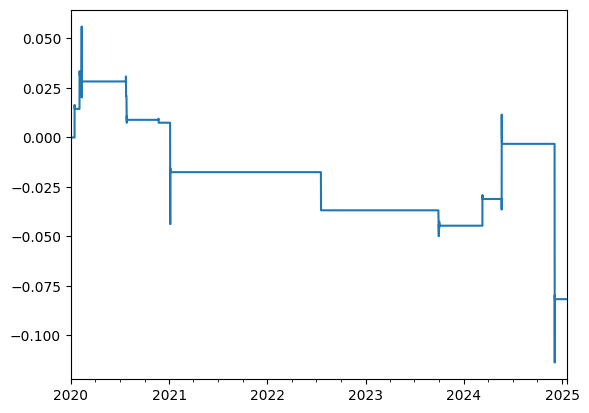

In [134]:
get_net_return(eth_bnb_price_no_rebal_holdings.shift(), no_rebal_ret).cumsum().plot()

In [135]:
eth_bnb_no_rebal_net_returns = get_net_return(eth_bnb_price_no_rebal_holdings.shift(), no_rebal_ret)
eth_bnb_no_rebal_net_returns.mean() / eth_bnb_no_rebal_net_returns.std() * np.sqrt(365 * 6)

-0.3219881333756999

### Other Things To Try

Other things to try:
- many pairs of two coins
- multiple regression of one coin predicted by many other correlated coins
- beta over a fixed period (not rolling)

## Many Pairs Of Two Coins

<Axes: >

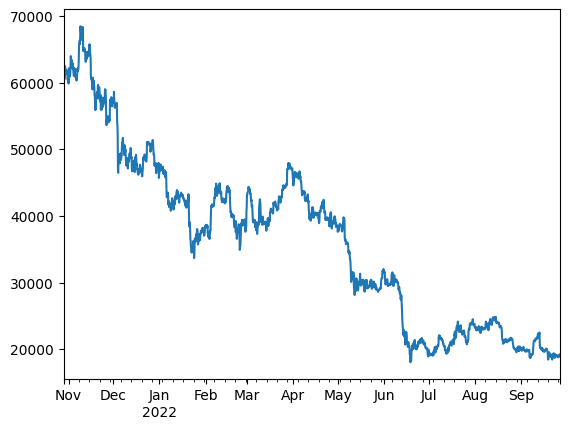

In [150]:
px_df['BTCUSDT'].iloc[4000:6000].plot()

<Axes: >

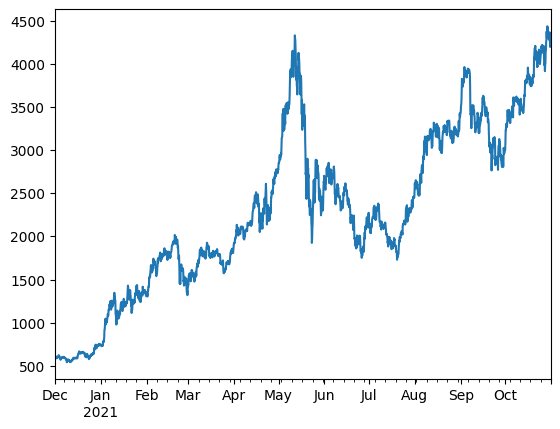

In [148]:
px_df['ETHUSDT'].loc[pd.to_datetime('2020-12-01 00:00'):pd.to_datetime('2021-10-31 20:00')].plot()

<Axes: >

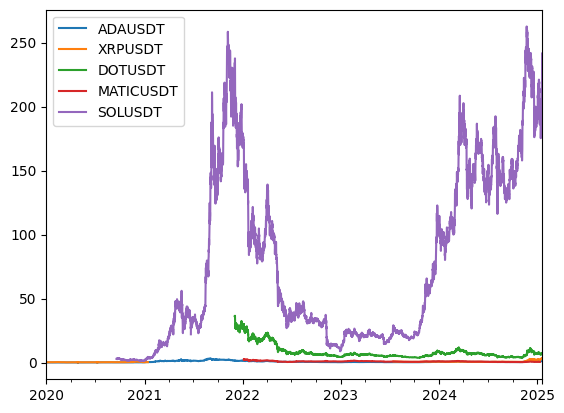

In [154]:
px_df.drop(columns=["BTCUSDT", "ETHUSDT", "BNBUSDT"]).plot()

In [155]:
# Historical snapshot of coins from December 01, 2019: https://coinmarketcap.com/historical/20191201/ used to
# get a representative set of coins from before the period of analysis.

strat_7_univ = ['BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'USDTUSDT', 'BCHUSDT', 'LTCUSDT', 'EOSUSDT', 'BNBUSDT',
        'BSVUSDT', 'XLMUSDT', 'TRXUSDT', 'ADAUSDT', 'XMRUSDT', 'LEOUSDT', 'XTZUSDT', 'LINKUSDT',
        'ATOMUSDT', 'HTUSDT', 'NEOUSDT', 'MIOTAUSDT', 'MKRUSDT', 'DASHUSDT', 'ETCUSDT', 'USDCUSDT',
        'ONTUSDT', 'MINUSDT', 'VETUSDT', 'XEMUSDT', 'CROUSDT', 'INOUSDT', 'DOGEUSDT', 'BATUSDT',
        'ZECUSDT', 'PAXUSDT', 'HEDGUSDT', 'DCRUSDT', 'INBUSDT', 'SNXUSDT', 'QTUMUSDT', 'MXMUSDT',
        'TUSDUSDT', 'ZRXUSDT', 'CENNZUSDT', 'PZMUSDT', 'HOTUSDT', 'THXUSDT', 'THRUSDT', 'ALGOUSDT',
        'REPUSDT', 'NANOUSDT', 'KBCUSDT', 'BTGUSDT', 'RVNUSDT', 'OMGUSDT', 'CNXUSDT', 'ABBCUSDT',
        'XINUSDT', 'VSYSUSDT', 'SEELEUSDT', 'EONUSDT', 'ZBUSDT', 'EKTUSDT', 'DGBUSDT', 'BTMUSDT',
        'LSKUSDT', 'KMDUSDT', 'SAIUSDT', 'LUNAUSDT', 'KCSUSDT', 'FTTUSDT', 'QNTUSDT', 'SXPUSDT',
        'BDXUSDT', 'GAPUSDT', 'BCDUSDT', 'THETAUSDT', 'ICXUSDT', 'FSTUSDT', 'MATICUSDT', 'SCUSDT',
        'EVRUSDT', 'BTTUSDT', 'MOFUSDT', 'IOSTUSDT', 'MCOUSDT', 'WAVESUSDT', 'XVGUSDT', 'MONAUSDT',
        'BTSUSDT', 'BCNUSDT', 'HCUSDT', 'MAIDUSDT', 'NEXOUSDT', 'ARDRUSDT', 'DXUSDT', 'OKBUSDT',
        'FXCUSDT', 'RLCUSDT', 'MBUSDT', 'BXKUSDT', 'DOTUSDT', 'SOLUSDT']

## Strategy 7: Use XGBoost On Price Data And Volume Data

Fit a model with features taken using price data and volume data. Consider using principal component analysis.

## Strategy 8: Seasonality Across The Week

Look for seasonal patterns during the period of a week. Maybe there is similar activity consistently during:

  - weekdays versus during weekends
  - morning versus night
  - Fridays
 
Over longer intervals:

  - first day of the month

In [171]:
np.random.seed(751)

print(1 / (102**2))

def get_min_diff(num_trials):
    total_min_diff = 0.0

    for _ in range(num_trials):
        rvs = np.random.uniform(size=101)
        rvs.sort()
        min_diff = rvs[0]
        min_diff = min(min_diff, 1 - rvs[-1])
        for index in range(len(rvs)-1):
            min_diff = min(min_diff, rvs[index+1]-rvs[index])
        total_min_diff += min_diff

    return total_min_diff / num_trials

for num_trials in [10**x for x in range(1, 7)]:
    print(f"{num_trials} trials, {get_min_diff(num_trials)}")

9.611687812379854e-05
10 trials, 6.279533187603104e-05
100 trials, 9.473426811017816e-05
1000 trials, 9.84895187032453e-05
10000 trials, 9.705341325120361e-05
100000 trials, 9.653166879815221e-05
1000000 trials, 9.617215952395997e-05
